<div style="background-color: #f8f9fa; padding: 20px;">
    <h1 style="color: #007bff; font-size: 32px; margin-bottom: 10px;">Ensemble Techniques Project</h1>
    <div style="color: #495057; font-size: 14px; margin-bottom: 5px;">by</div>
    <div style="color: #343a40; font-size: 20px; margin-bottom: 15px;">Prashant Patil</div>
    <div style="color: #6c757d; font-size: 14px;">AIML Online October 2023-A Batch</div>
    <div style="color: #6c757d; font-size: 14px;">22 Feb 2024</div>
</div>

# Table of Contents

__Tasks Planned__
* Import libraries
* Data Reading and Merging: Access and combine datasets as necessary.
* Handling Missing or Unexpected Values: Eliminate or address any missing or unexpected data points.
* Data Type Validation and Conversion: Ensure variables are in suitable data formats.
* Exploratory Data Analysis (EDA): Examine data, identify outliers, assess correlation and collinearity.
* Variable Encoding: Encode pertinent variables for analysis or modeling.
* Feature Selection: Eliminate irrelevant columns to streamline model complexity.
* Data Normalization: Standardize data to a common scale.
* Oversampling: Address class imbalance if applicable.
* Data Splitting: Divide data into training and testing subsets for model assessment.
* Define goal statement : Understand business scenario and define goal statement and measurement criteria based on requirement
* Model building and performance measurement
* Conclusion

__Common reusable functions used for EDA__
   - plot_categorical_pie_charts : This is to plot pie charts (3 in a row) and check distribution of all categorical variables in dataframe using Plotly
   - PlotSunburst : This is to plot Sunburst chart for each categorical variable along with target variable Churn to compare distribution of the churn with respective categorical variables.
   - plot_boxplots : This is to plot boxplots and check distribution of numerical variables in dataframe.
   - ChurnComparisonPlot : This is to plot countplot for each categorical variable with target variable churn to compare the dictribution and  to see what is impacting churn the most.

__Common reusable functions used for model building and performance measurement__
   - AddModelResults : This is to store results of each model in results dataframe. Results can be used to derive best models.
   
   - Modelfit_print : This is for model building and performance printing. It performs:
        - Train model
        - Print performance metrics
        - Call function to store data in results dataframe
        - Call function to Print confusion metrics
        - Call function to print feature importance
        - Call function to print decision tree (in case of relevant model)
    
   - Print_ConfusionMatrix : This is to print confusion metrics for given set of test and predicted data
   
   - GridSearchTuning : This is for hyperparameter tuning for given model and given parameters. This will perform :
         - Find best model using parameter tuning
         - Call function to train model and to print performance
   
   - PlotImportanceChart : This is to print bar chart of features with importance
   
   - plot_decision_tree_image : This is to print decision tree for given model

In [1]:
#import necessarry libraries
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style= 'darkgrid')
# pre-processing method
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
# the classifiers models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# methods and classes for evaluation
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, classification_report, precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score

from math import sqrt
from sklearn.model_selection import cross_validate,cross_val_score, KFold, GridSearchCV
import time
from imblearn.over_sampling import SMOTE
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
# import plotly.io as pio
# pio.renderers.default = "notebook_connected"

#Libraries for printing decision tree
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus
import graphviz

## Q.1. Data Understanding & Exploration

### Q.1.A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. 

In [2]:
# import data from 1st csv file
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')  
df1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

### Q.1.B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [3]:
# import data from 2nd csv file
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')  # import the csv file
df2.head()

customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges TotalCharges Churn  
0           29.85        29.85    No  
1           56.95       1889.5    No  
2           53.85       108.15   Yes  
3           42.30      1840.75    No  
4           70.70       151.65   Yes

### Q.1.C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [4]:
#Lets merge two dataframes into one
dfMerge = pd.merge(df1, df2, on='customerID')
dfMerge.shape
df1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

### Q.1.D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

In [5]:
# Check if all columns are incorporated using comparison operator
if (set(df1.columns).union(set(df2.columns)) == set(dfMerge.columns)):
    print("All columns are incorporated in the merged dataframe.")
else:
    print("Not all columns are incorporated in the merged dataframe.")


All columns are incorporated in the merged dataframe.


## Q.2. Data Cleaning & Analysis

### Q.2.A. Impute missing/unexpected values in the DataFrame

In [6]:
#Check null values
print("percentage of missing data of dataframe \n",dfMerge.isnull().sum()/len(dfMerge)*100) 


percentage of missing data of dataframe 
 customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


No null values.

Lets work on unexpected values in dataset

In [7]:
#Unique values for each column
columns = ['gender','SeniorCitizen','Partner', 'Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']
print('Unique values for categorical variables')
for col in columns:
    print(col + ':' + str(dfMerge[col].unique()) + '\n')


Unique values for categorical variables
gender:['Female' 'Male']

SeniorCitizen:[0 1]

Partner:['Yes' 'No']

Dependents:['No' 'Yes']

tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService:['No' 'Yes']

MultipleLines:['No phone service' 'No' 'Yes']

InternetService:['DSL' 'Fiber optic' 'No']

OnlineSecurity:['No' 'Yes' 'No internet service']

OnlineBackup:['Yes' 'No' 'No internet service']

DeviceProtection:['No' 'Yes' 'No internet service']

TechSupport:['No' 'Yes' 'No internet service']

StreamingTV:['No' 'Yes' 'No internet service']

StreamingMovies:['No' 'Yes' 'No internet service']

Contract:['Month-to-month' 'One year' 'Two year']

PaperlessBilling:['Yes' 'No']

PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn:['No' 'Yes']



In [8]:
#Lets find if blank values/ non numeric values in data
numeric_column = pd.to_numeric(dfMerge['TotalCharges'], errors='coerce')

# Check for NaN values to identify non-numeric data
non_numeric_data = dfMerge[numeric_column.isna()]

if non_numeric_data.empty:
    print("All data in the column is numeric.")
else:
    print("Non-numeric data found in the column.")
   
non_numeric_data

Non-numeric data found in the column.


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

It has been noticed that 11 rows are not having any data in TotalCharges column. Also, tenure for these rows is 0. Hence instead of imputing the median/mean values we would like to delete this data as it is not impact data size. Also we are not adding any bias.

In [9]:
#Lets delete data with blank values
print(dfMerge.shape)
# Preprocess the 'TotalCharges' column to replace empty strings and whitespace strings with NaN
dfMerge['TotalCharges'] = dfMerge['TotalCharges'].replace({'': pd.NA, ' ': pd.NA})
dfMerge.dropna(inplace=True)
print(dfMerge.shape)

(7043, 21)
(7032, 21)


### Q.2.B. Make sure all the variables with continuous values are of ‘Float’ type

In [10]:
#Check data structure
print(dfMerge.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [11]:
#Now that we have deleted blank values, we can easily convert totalcharges into float
dfMerge['TotalCharges'] = dfMerge['TotalCharges'].astype('float64')
print(dfMerge.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Q.2.C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart

In [12]:
#Function to plot pie charts for categorical variable of dataframe
def plot_categorical_pie_charts(df):
    # Get the list of column names excluding 'customerID'
    columns = df.columns[df.columns != 'customerID']
    
    # Filter categorical columns (object data type)
    cat_columns = [col for col in columns if pd.api.types.is_object_dtype(df[col])]
    
    # Calculate the number of rows needed based on the number of categorical columns
    num_cols = len(cat_columns)
    num_rows = (num_cols + 2) // 3  # Add 2 and divide by 3 to ensure at least one row

    # Create subplots with three pie charts per row
    fig = go.Figure()
    for i, col in enumerate(cat_columns):
        # Count the frequency of each category
        category_counts = df[col].value_counts()
        
        # Calculate the row and column indices
        row_index = i // 3
        col_index = i % 3
        
        # Define the domain for the current pie chart
        domain_x = [(0.33 * col_index)+0.03, (0.33 * (col_index + 1))-0.03]
        domain_y = [1 - (row_index + 1) / (num_rows + 1) + 0.02, 
                    1 - row_index / (num_rows + 1) - 0.02]
        
        # Create pie chart trace
        fig.add_trace(go.Pie(labels=category_counts.index, values=category_counts.values,
                             textinfo='percent+label', hole=0.3, textposition='inside',
                             name=f'Pie Chart for {col}',
                             domain={'x': domain_x, 'y': domain_y}))
        annotation_x = (domain_x[0] + domain_x[1]) / 2
        annotation_y = 1 - row_index / (num_rows + 1) - 0.02 
        
        fig.add_annotation(x=annotation_x, y=annotation_y,
                           text=f'<b>{col}</b>', showarrow=True, font=dict(size=12))

    # Update layout
    fig.update_layout(title='Pie Charts for Categorical Features',
                      showlegend=False,
                      height=600 + 300 * num_rows)
    
    # Show plot
    fig.show()




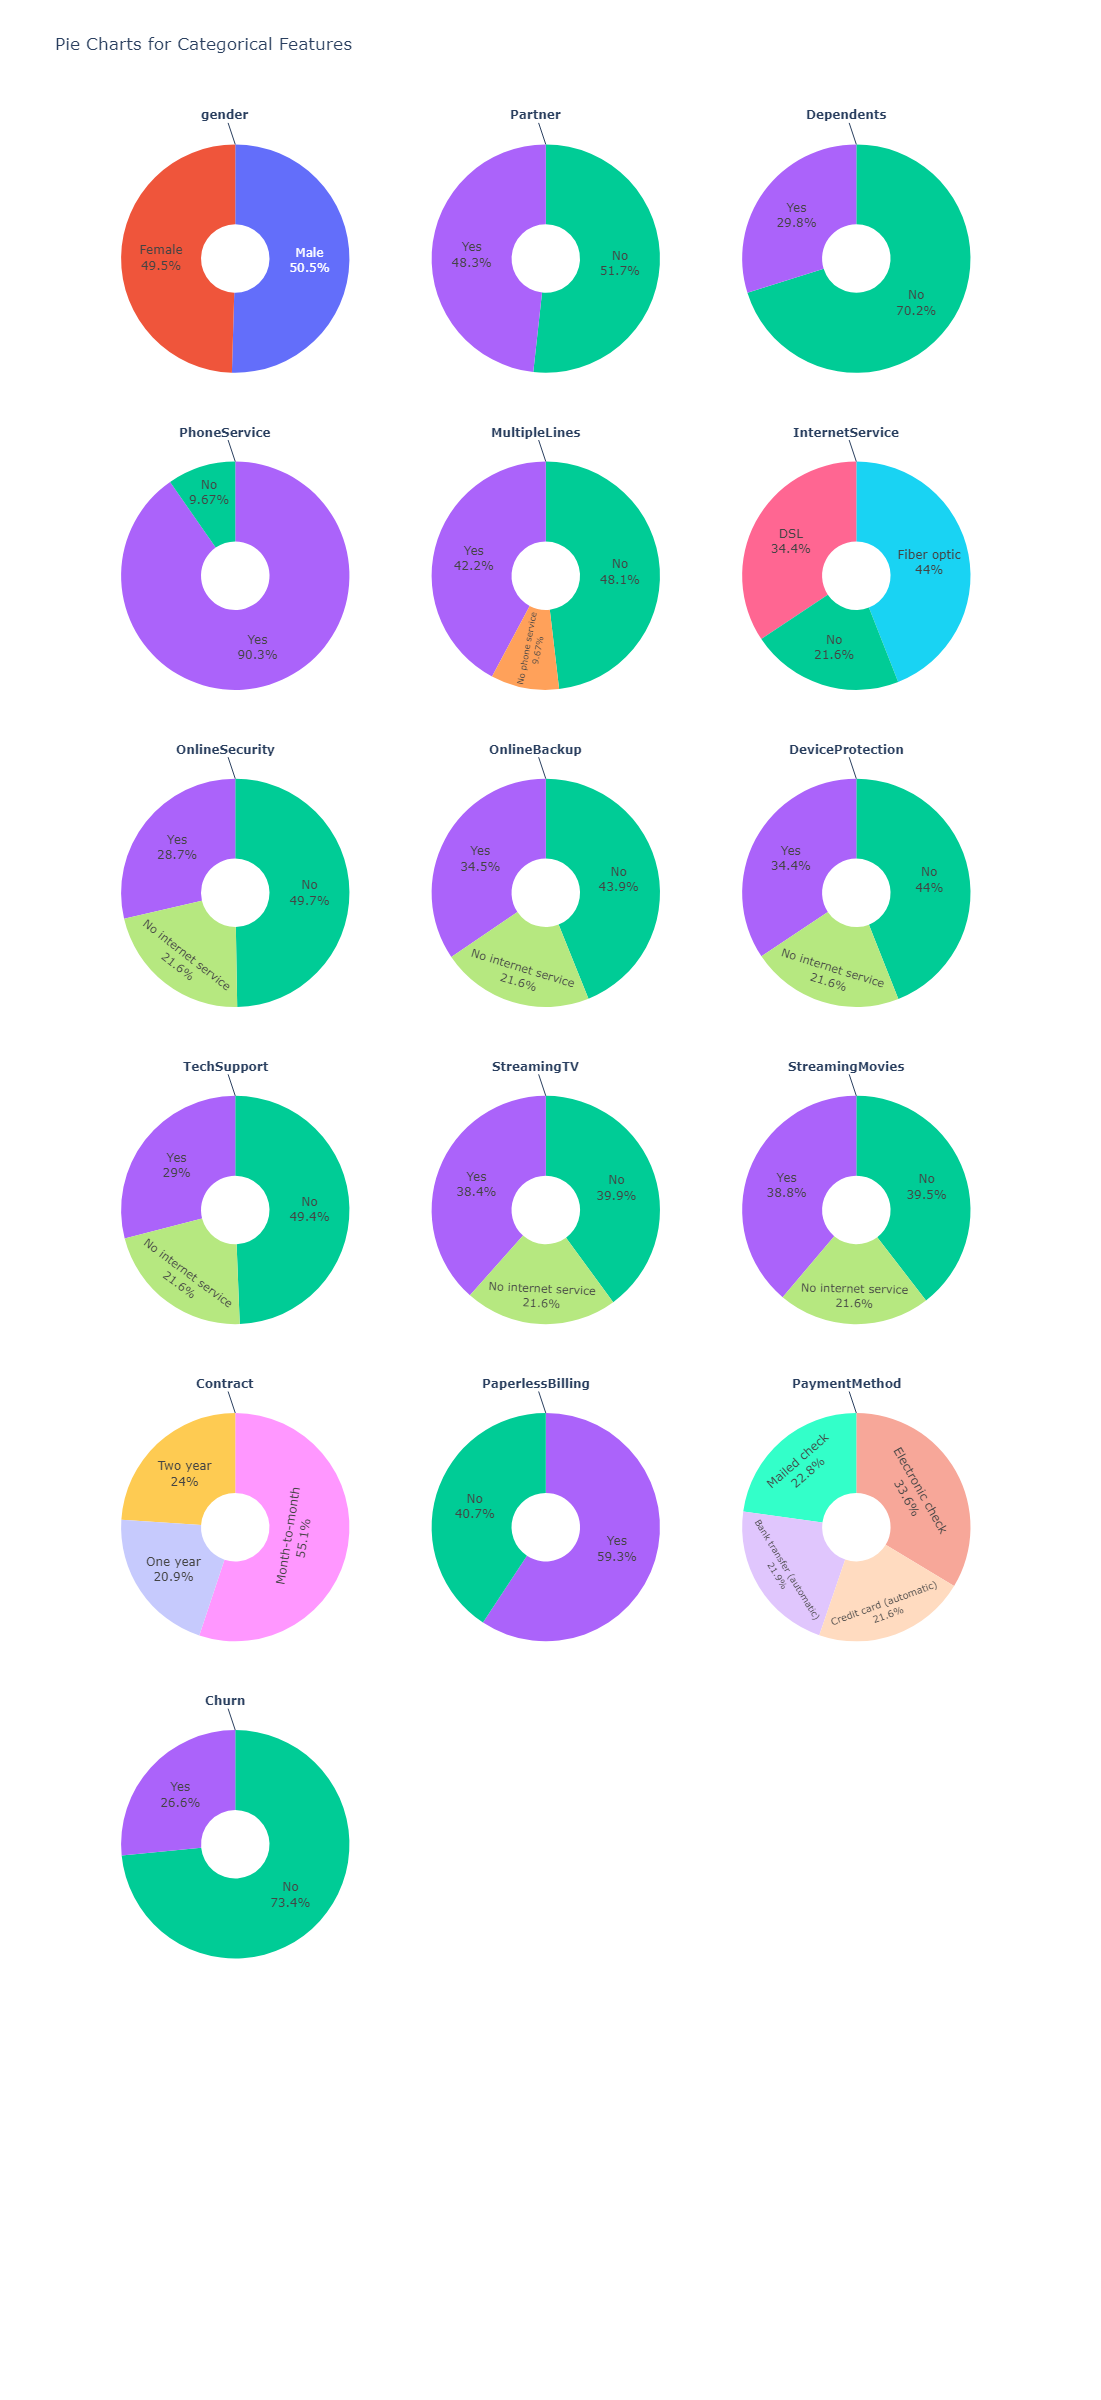

In [13]:
#Call the function to plot pie charts of all categorical variables in data
plot_categorical_pie_charts(dfMerge)

In [14]:
#Function to plot Sunburst for every categorical variable along with the churn rate. This will help in analyzing churning against every independent variable.
def PlotSunburst(data, category_column, churn_column, color_sequence):
    fig = px.sunburst(data, path=[category_column, churn_column], 
                      color=churn_column, 
#                        color_discrete_sequence=color_sequence,
                      title=f"Sunburst Chart for {category_column} vs Churn",height=500,width=500,
                      labels={category_column: category_column, churn_column: churn_column, 'percent': '%'})

    # Add annotation for 'Churn' in outer circle
    fig.add_annotation(
        x=0.5, y=0.06,
        text=churn_column,
        font=dict(size=15),
        showarrow=False,
    )
    
    # Add annotation for column name in inner circle
    fig.add_annotation(
        x=0.5, y=0.7,
        text=category_column,
        font=dict(size=15),
        showarrow=False,
    )
    fig.show()

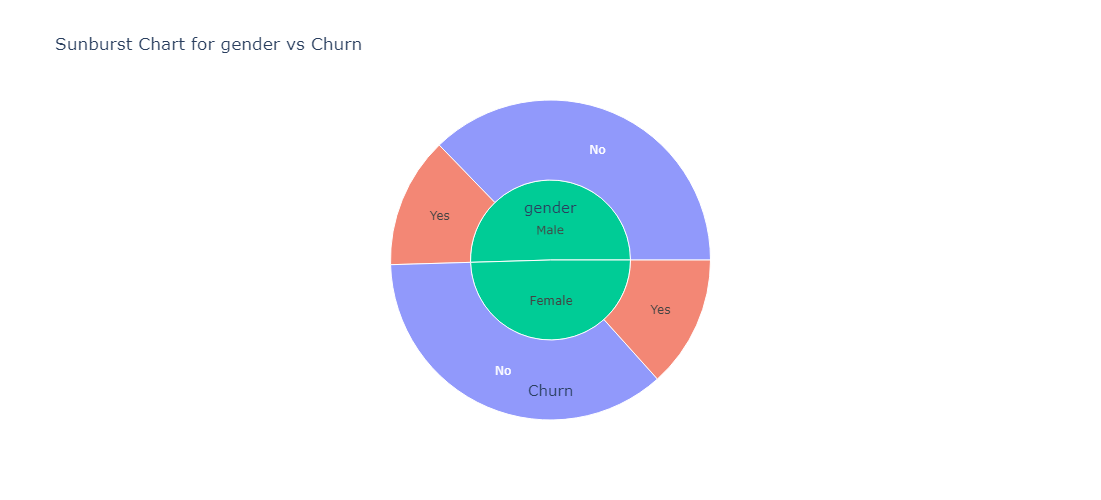

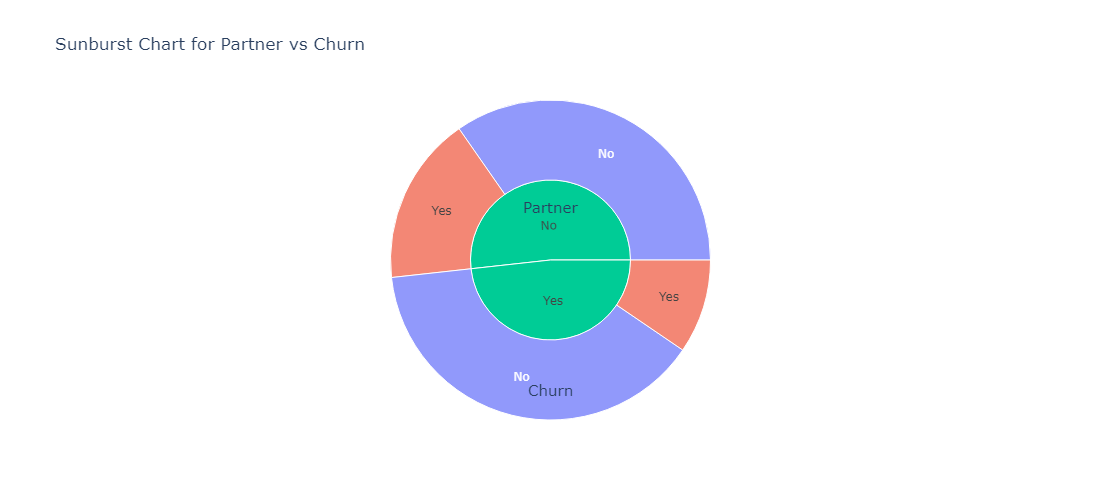

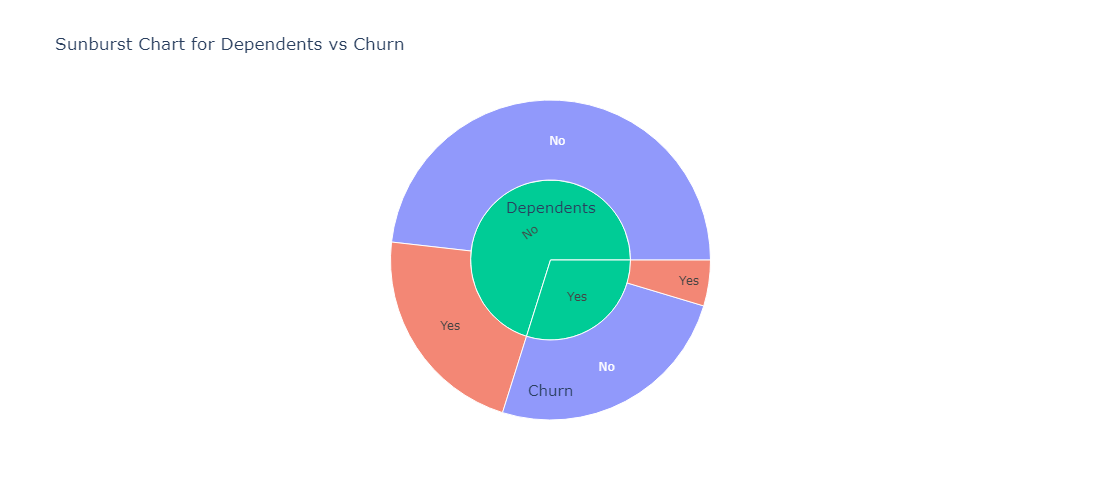

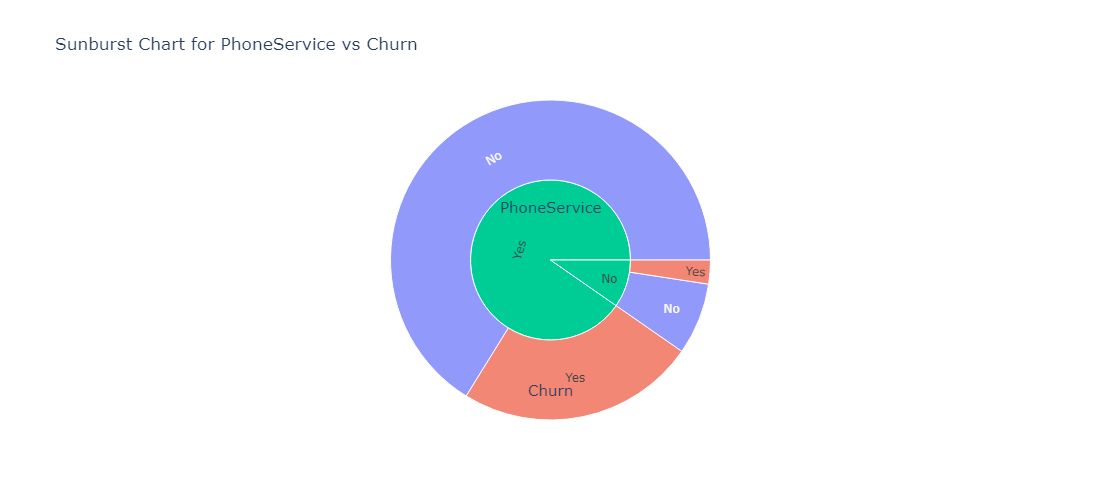

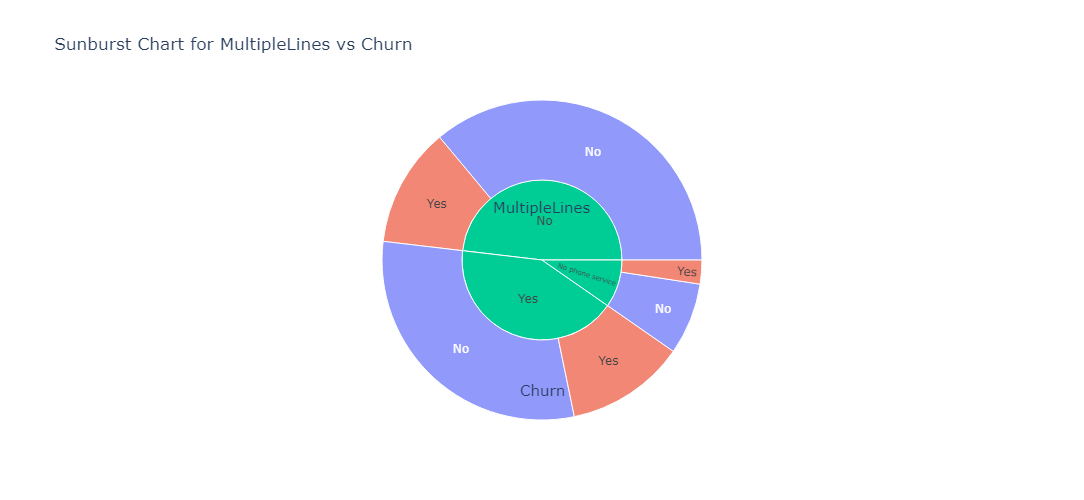

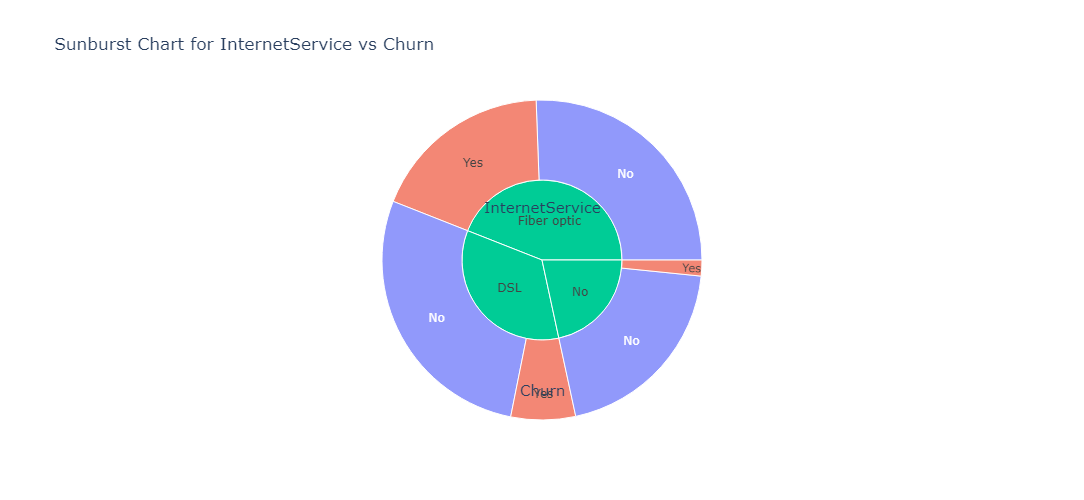

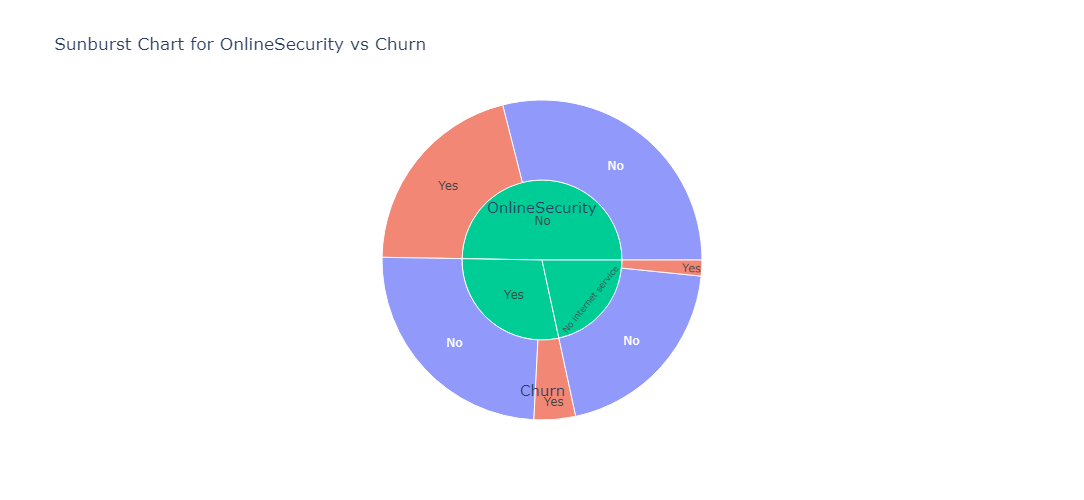

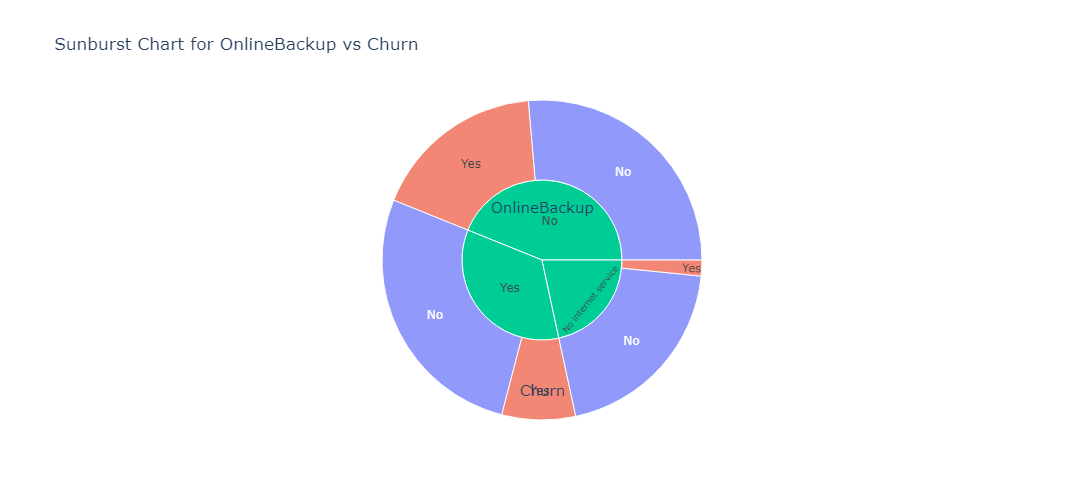

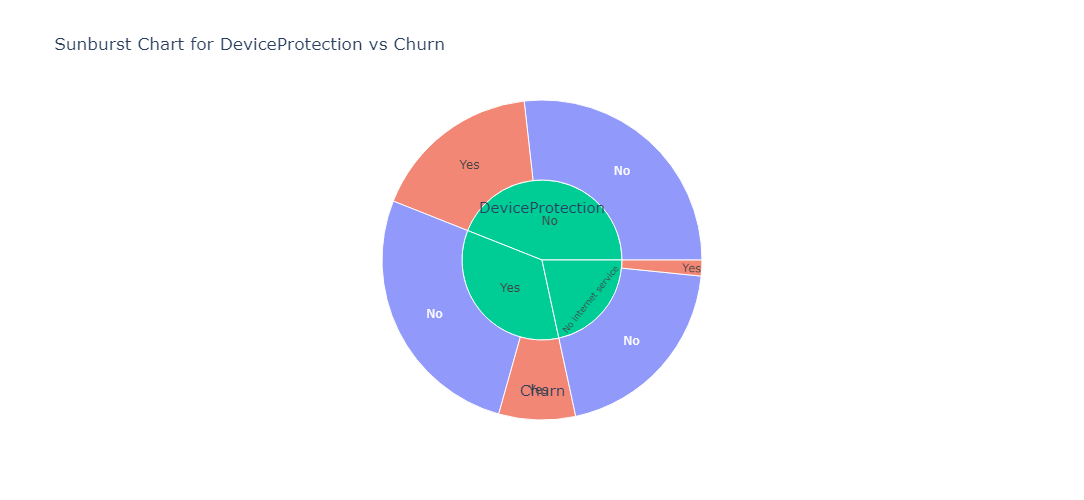

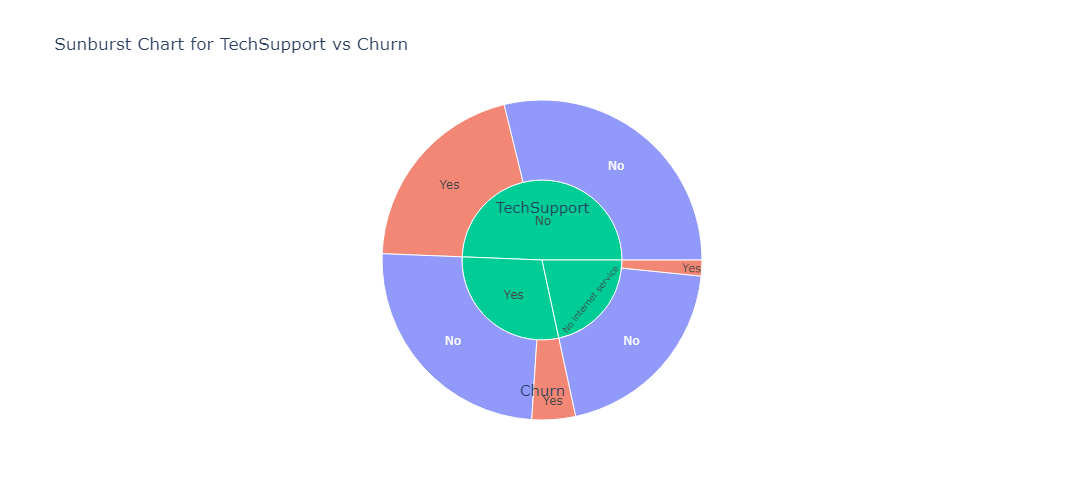

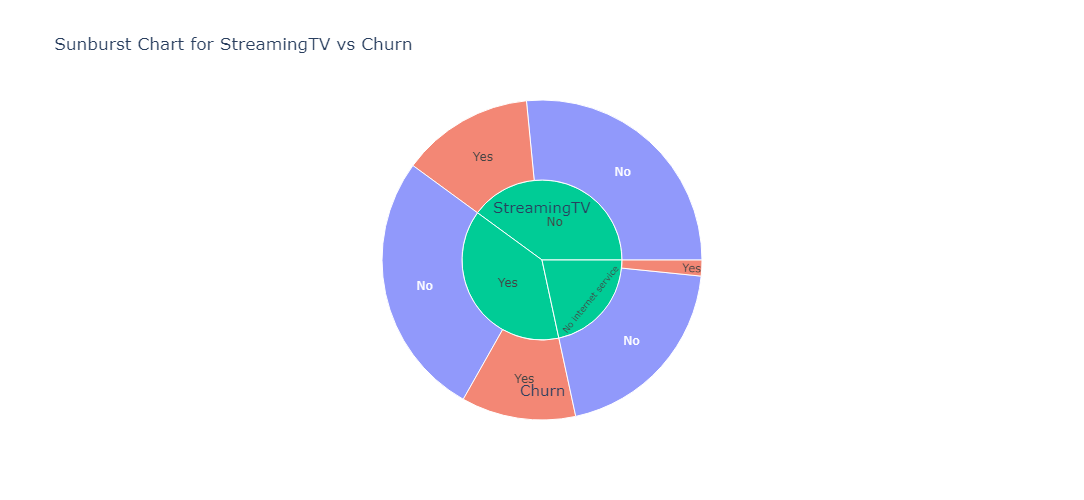

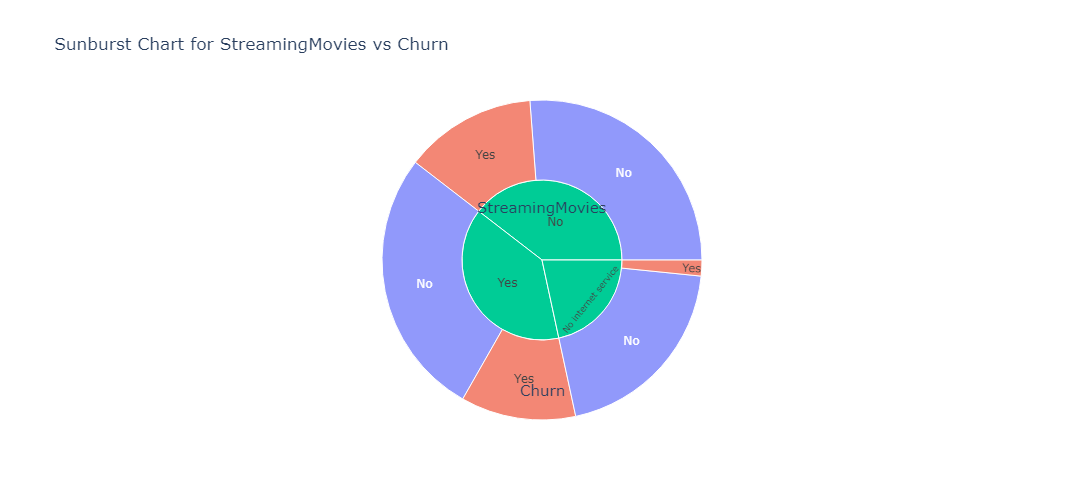

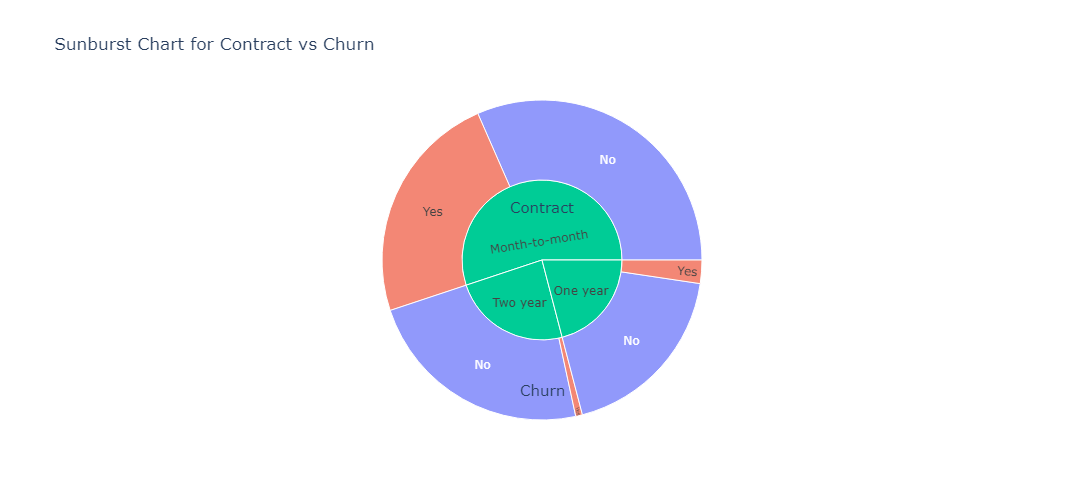

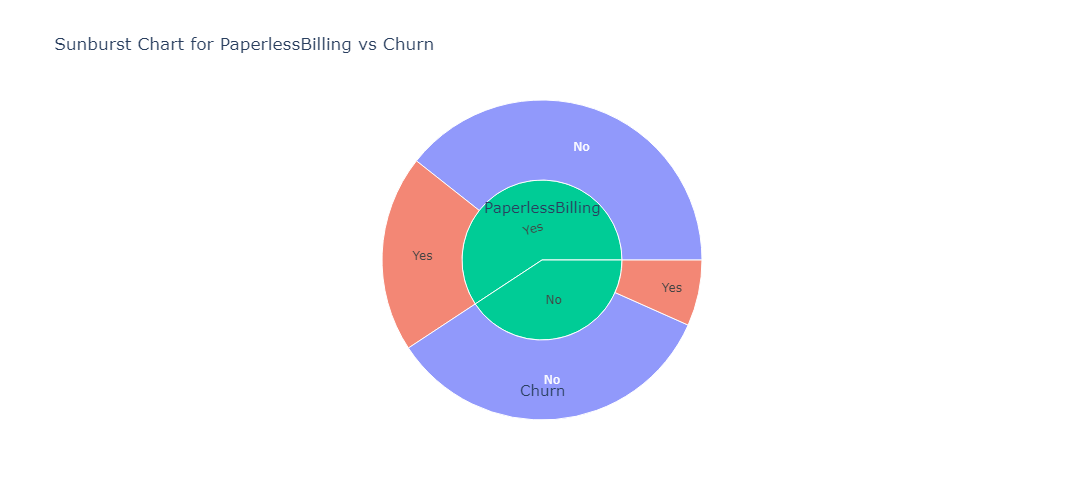

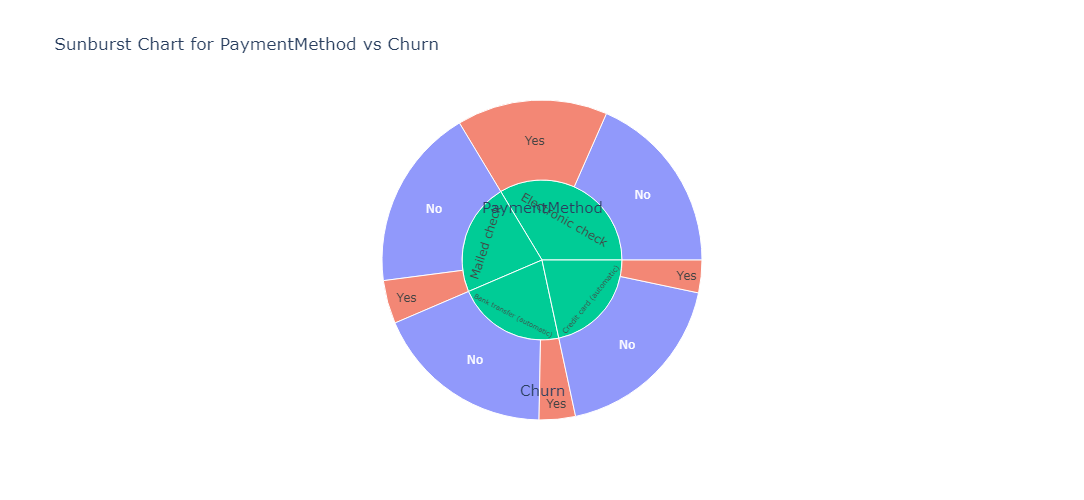

In [15]:
#Call sunburst function to plot sunburst to check churn rate against each independent variable
# List of categorical columns (excluding Churn column)
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection']
categorical_columns1 = ['TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']
# List of color themes for each chart
color_themes = px.colors.qualitative.Plotly

# Create sunburst charts for each categorical column with different color themes
for column, color_theme in zip(categorical_columns, color_themes):
    PlotSunburst(dfMerge, column, 'Churn', [color_theme])

for column, color_theme in zip(categorical_columns1, color_themes):
    PlotSunburst(dfMerge, column, 'Churn', [color_theme])

### Q.2.D. Share insights for Q2.c

__Pie Chart insights | Distribution__

* Below variables have almost equal distributions among values/classes inside respective columns
    - gender, 
    - partner, 
    - PaymentMethod

* Below variables have almost unequal distributions among values/classes inside respective columns
    - dependets, 
    - PhoneService, 
    - MultipleLines, 
    - InternetServices, 
    - OnlineSecurity,
    - OnlineBackup,
    - DeviceProtection, 
    - TechSupport,
    - StreamingTV,
    - StreamingMovies, 
    - Contract, 
    - PaperlessBilling,
    - Churn

* Distributions for below variables is almost similar. Meaning they all have same number of values with similar % distributions
    - InternetServices, Onlinesecurity, OnlineBackup,DeviceProtection, StreamingTV,StreamingMovies

* Almost everyone opted for phone service

* Most customers don't have have dependents

* 21.6 % dont use any internet service. Understandably, these 21.6% dont have services InternetServices, Onlinesecurity, OnlineBackup,DeviceProtection, StreamingTV,StreamingMovies, techsupport

* Most of the customers opts for Month to month contract however almost 44% having long term contract

* 26% customers are churned

__Sunburst chart inference__

Churn rate is observed __maximum__ when 
    
* Who has month-to-month contract
* Who pays bill though Electronic check
* Who uses fiber optic for internet service
* Who has less tenure
* Who dont opt for services like Tech support, Online security, online backup
* Fiber optic used for internet 
* Customer has dependents


On the other hand, customer churn is less
* Who has 2 years contract
* Whose tenure is 72
* Who dont uses internet service

## Exploratory Data Analysis (EDA)

In [16]:
#Data description
dfMerge.describe(include='all').T

count unique               top  freq         mean  \
customerID          7032   7032        7590-VHVEG     1          NaN   
gender              7032      2              Male  3549          NaN   
SeniorCitizen     7032.0    NaN               NaN   NaN       0.1624   
Partner             7032      2                No  3639          NaN   
Dependents          7032      2                No  4933          NaN   
tenure            7032.0    NaN               NaN   NaN    32.421786   
PhoneService        7032      2               Yes  6352          NaN   
MultipleLines       7032      3                No  3385          NaN   
InternetService     7032      3       Fiber optic  3096          NaN   
OnlineSecurity      7032      3                No  3497          NaN   
OnlineBackup        7032      3                No  3087          NaN   
DeviceProtection    7032      3                No  3094          NaN   
TechSupport         7032      3                No  3472          NaN   
StreamingTV         7032      3                No  2809          NaN   
StreamingMovies     7032      3                No  2781          NaN   
Contract            7032      3    Month-to-month  3875          NaN   
PaperlessBilling    7032      2               Yes  4168          NaN   
PaymentMethod       7032      4  Electronic check  2365          NaN   
MonthlyCharges    7032.0    NaN               NaN   NaN    64.798208   
TotalCharges      7032.0    NaN               NaN   NaN  2283.300441   
Churn               7032      2                No  5163          NaN   

                          std    min      25%       50%        75%     max  
customerID                NaN    NaN      NaN       NaN        NaN     NaN  
gender                    NaN    NaN      NaN       NaN        NaN     NaN  
SeniorCitizen        0.368844    0.0      0.0       0.0        0.0     1.0  
Partner                   NaN    NaN      NaN       NaN        NaN     NaN  
Dependents                NaN    NaN      NaN       NaN        NaN     NaN  
tenure               24.54526    1.0      9.0      29.0       55.0    72.0  
PhoneService              NaN    NaN      NaN       NaN        NaN     NaN  
MultipleLines             NaN    NaN      NaN       NaN        NaN     NaN  
InternetService           NaN    NaN      NaN       NaN        NaN     NaN  
OnlineSecurity            NaN    NaN      NaN       NaN        NaN     NaN  
OnlineBackup              NaN    NaN      NaN       NaN        NaN     NaN  
DeviceProtection          NaN    NaN      NaN       NaN        NaN     NaN  
TechSupport               NaN    NaN      NaN       NaN        NaN     NaN  
StreamingTV               NaN    NaN      NaN       NaN        NaN     NaN  
StreamingMovies           NaN    NaN      NaN       NaN        NaN     NaN  
Contract                  NaN    NaN      NaN       NaN        NaN     NaN  
PaperlessBilling          NaN    NaN      NaN       NaN        NaN     NaN  
PaymentMethod             NaN    NaN      NaN       NaN        NaN     NaN  
MonthlyCharges      30.085974  18.25  35.5875     70.35    89.8625  118.75  
TotalCharges      2266.771362   18.8   401.45  1397.475  3794.7375  8684.8  
Churn                     NaN    NaN      NaN       NaN        NaN     NaN

No abnormility found in data.

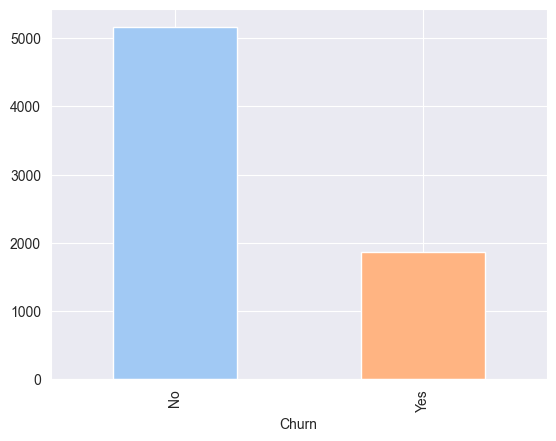

Class Distribution (%) for Churn:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [17]:
#Lets plot distribution of target variable
palette = sns.color_palette("pastel")
dfMerge['Churn'].value_counts().plot(kind = 'bar', color=palette)
plt.show()
print("Class Distribution (%) for Churn:")
print(dfMerge['Churn'].value_counts(normalize=True) * 100)

In [18]:
#Function to plot bar chart for categorical variable with Churn 
def ChurnComparisonPlot(df, col1, col2=None):
    if(col2 is None):
        fig = plt.figure(figsize = (15, 5))
        sns.countplot(x = col1, data = df, palette = sns.color_palette("pastel"), orient = 'v',
                      hue = 'Churn').set_title(col1.capitalize() +'/ Churn',fontsize = 10)

        plt.xticks(rotation = 90)
        plt.legend(labels = ['Not churned', 'Churned'])   
    else:
        fig = plt.figure(figsize = (10, 3))        
        ax = fig.add_subplot(121)        
        sns.countplot(x = col1, data = df, palette = sns.color_palette("pastel"), ax = ax, orient = 'v',
                      hue = 'Churn').set_title(col1.capitalize() +'/ Churn',fontsize = 10)

        plt.xticks(rotation = 90)
        plt.legend(labels = ['Not churned', 'Churned'])        
        ax = fig.add_subplot(122)
        sns.countplot(x = col2, data = df, palette = sns.color_palette("pastel"), ax = ax, orient = 'v', 
                      hue = 'Churn').set_title(col2.capitalize() +'/ Churn', fontsize = 10)    
        plt.xticks(rotation = 90)
        plt.legend(labels = ['Not churned', 'Churned'])
    return plt.show()

In [19]:
#Function to plot Boxplots for numeric variables in dataframe
def plot_boxplots(df):
    # Filter numeric columns
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Plot boxplots for each numeric column
    for col in numeric_columns:
        if col != 'SeniorCitizen':
            fig = px.box(df, x=col, title=f'Boxplot for {col}')
            fig.update_layout(height=400, width=800)
            fig.update_traces(marker_color='lightskyblue')
            fig.show()

__Univariate analysis__

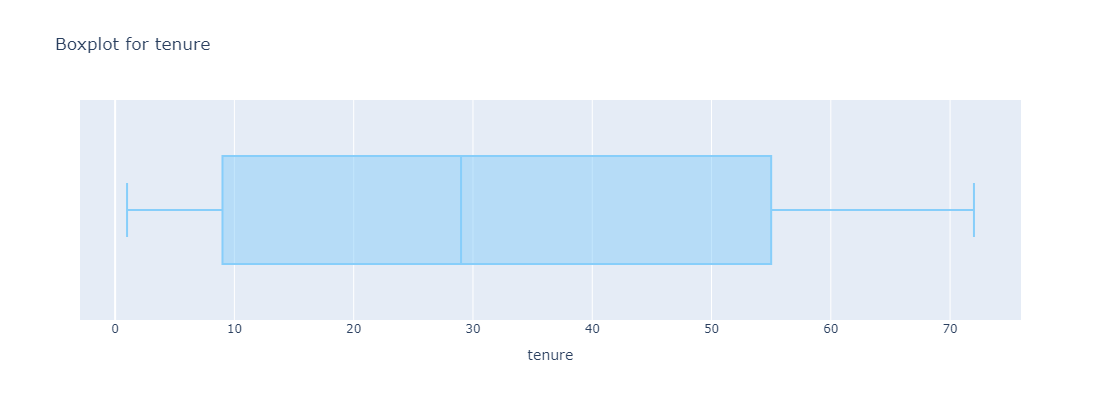

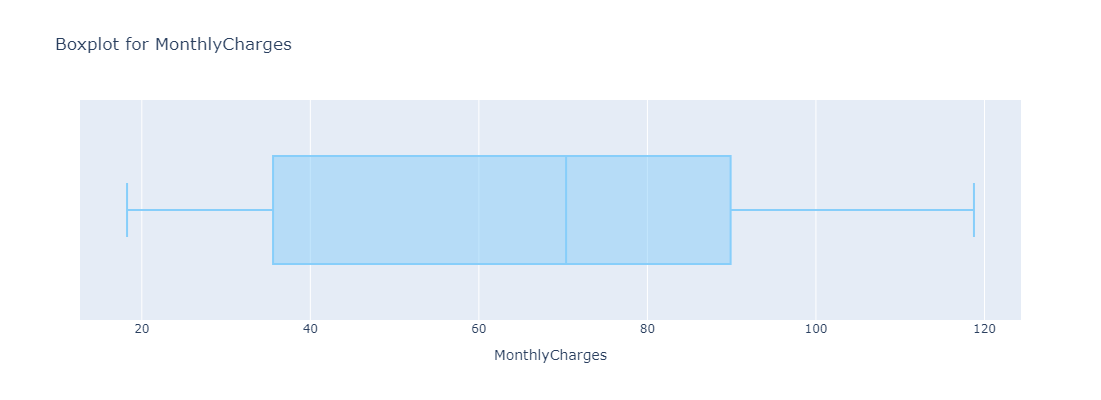

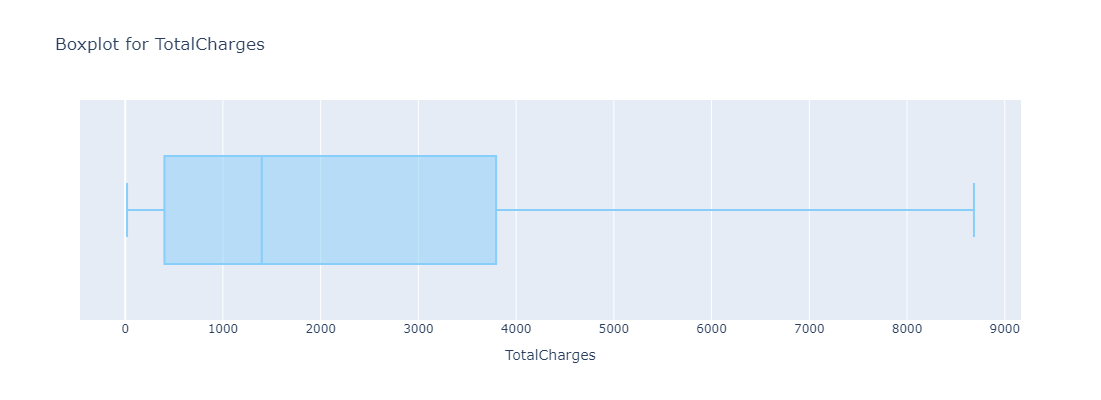

In [20]:
#Lets check data distributions of numeric variables
plot_boxplots(dfMerge)

__Insigts__
* No outliers in data
* Totalcharges plot is left skewed stating maximum distribution for low total charges.

__Bivariate analysis__

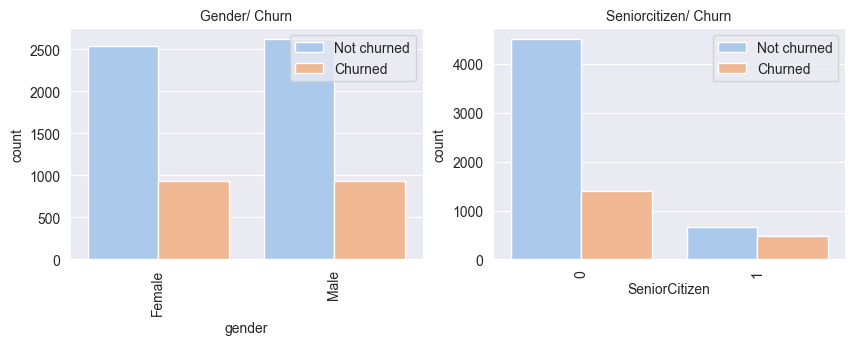

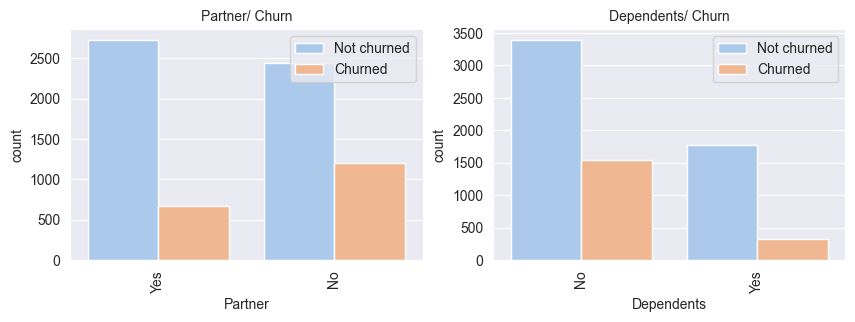

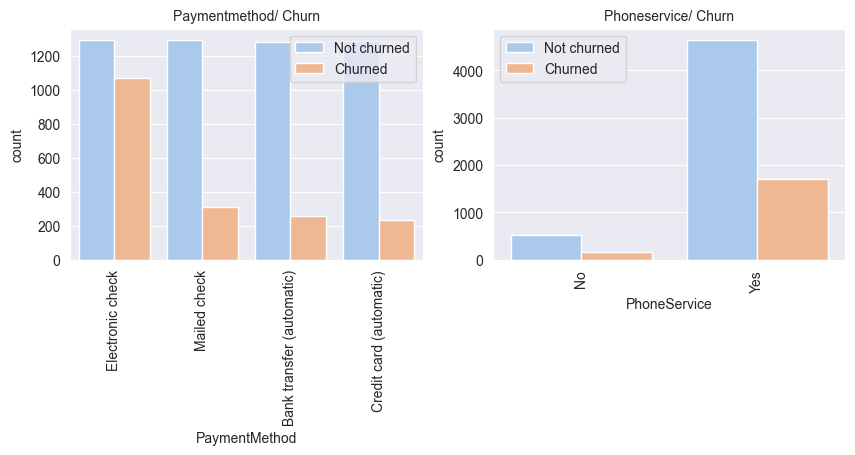

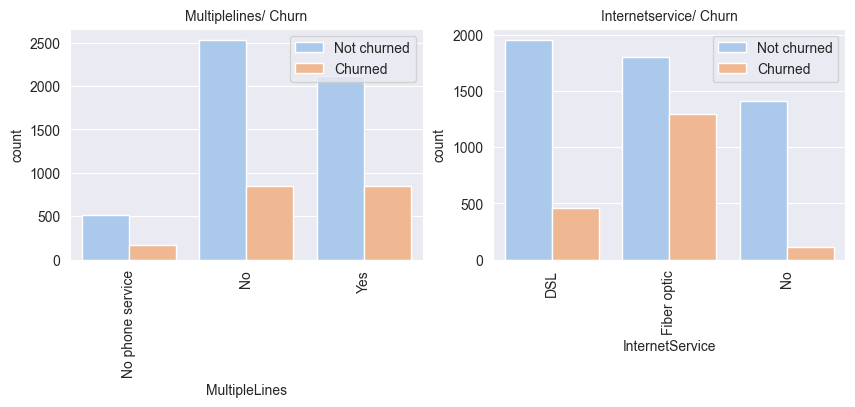

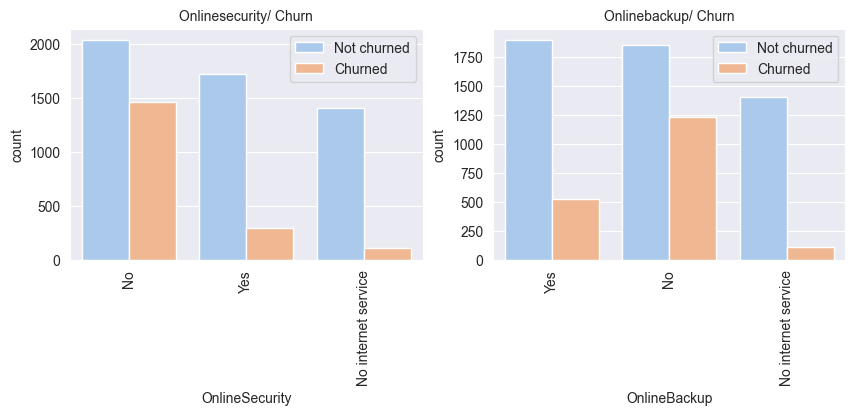

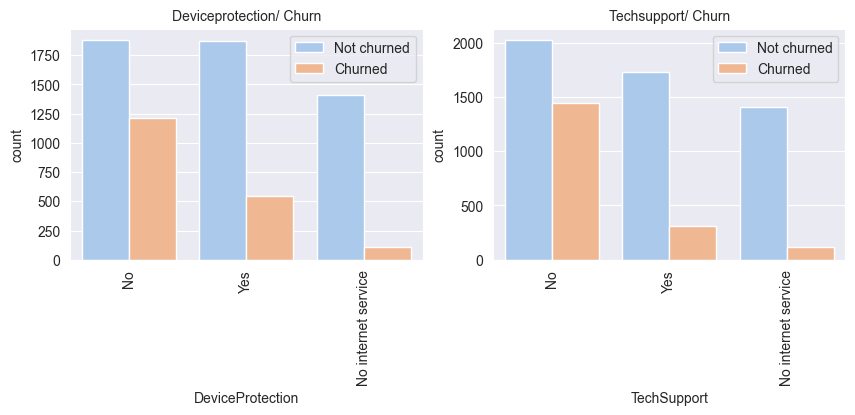

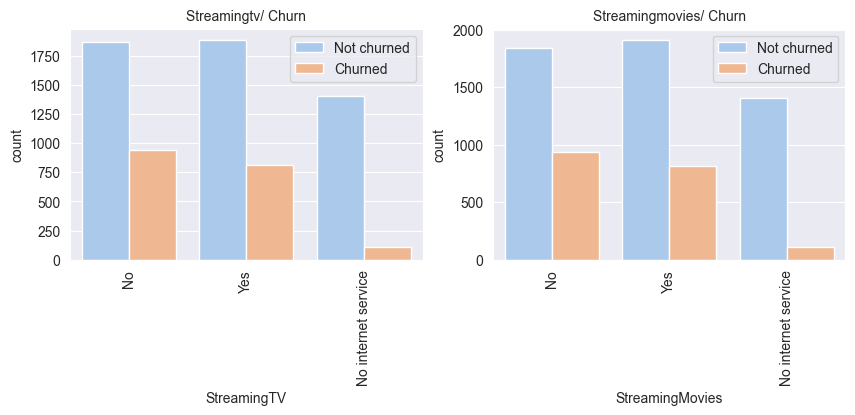

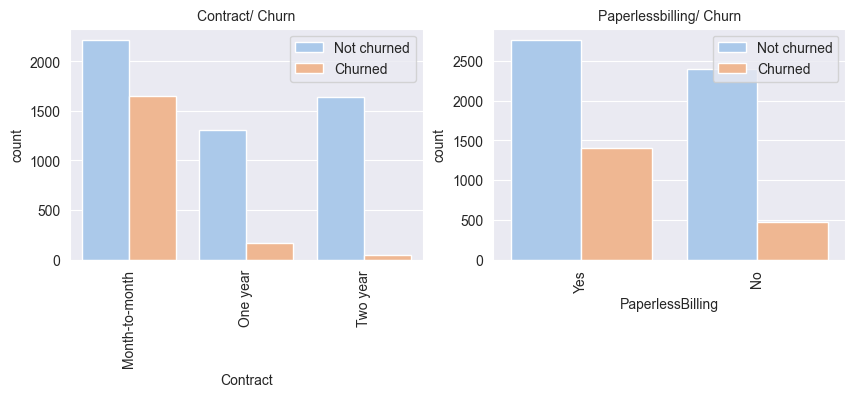

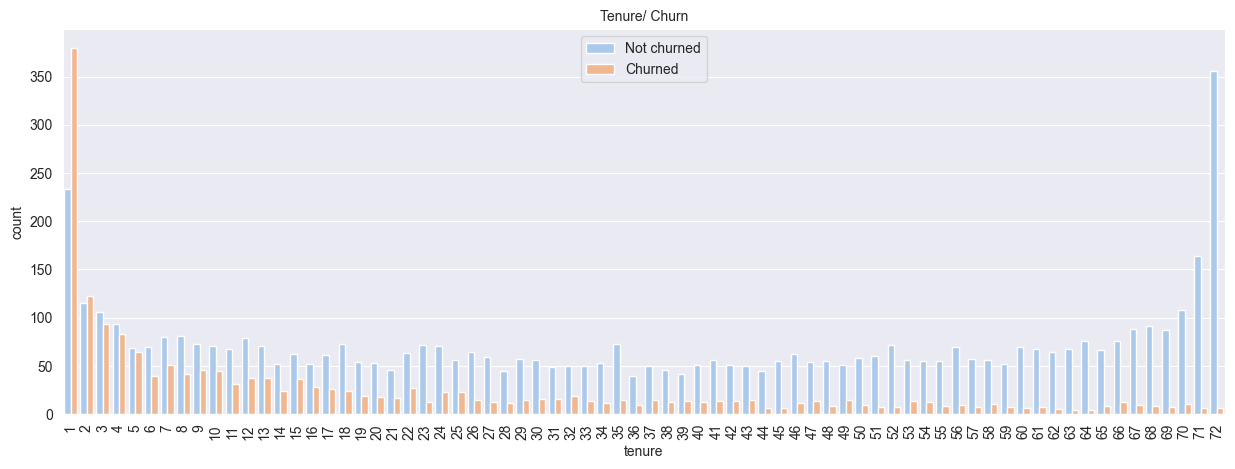

In [21]:
#Lets check comparison of Churn with every categorical variable using countplot
ChurnComparisonPlot(dfMerge,'gender','SeniorCitizen')
ChurnComparisonPlot(dfMerge,'Partner','Dependents')
ChurnComparisonPlot(dfMerge,'PaymentMethod','PhoneService')
ChurnComparisonPlot(dfMerge,'MultipleLines','InternetService')
ChurnComparisonPlot(dfMerge,'OnlineSecurity','OnlineBackup')
ChurnComparisonPlot(dfMerge,'DeviceProtection','TechSupport')
ChurnComparisonPlot(dfMerge,'StreamingTV','StreamingMovies')
ChurnComparisonPlot(dfMerge,'Contract','PaperlessBilling')
ChurnComparisonPlot(dfMerge,'tenure',None)


__Insights__

It has been noticed that customer churn is more 
* Who has month-to-month contract
* Who pays bill though Electronic check
* Who uses fiber optic for internet service
* Who has less tenure
* Who dont opt for services like Tech support, Online security, online backup

On the other hand, customer churn is less
* Who has 2 years contract
* Whose tenure is 72
* Who dont uses internet service

### Q.2.E. Encode all the appropriate Categorical features with the best suitable approach

We have two categories of variables those need encoding. 
- Variables with binary values : We can apply binary encoding on these.
- Variables with multiple values (But specific order is required). We can encode using replaceStruct mechanism here. While doing so we will ensure to keep consistent values to relevant columns. This will help finding correlation analysis.

In [22]:
#Lets use binary encoding for variables with binary values 

#Columns suitable for binary encoding
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Perform binary encoding
for column in binary_columns:
    dfMerge[column] = pd.factorize(dfMerge[column])[0]


In [51]:
# Lets use replace struct mechanism for columns with more than 2 values

replaceStruct = {
                "MultipleLines":     {"No": 1, "Yes": 2,  "No phone service":-1},
                "InternetService": {"No": 1, "Fiber optic":2 , "DSL": 3},
                "OnlineSecurity": {"No": 1, "Yes":2 , "No internet service": -1},
                "OnlineBackup":     {"No": 1, "Yes":2 , "No internet service": -1},
                "DeviceProtection":  {"No": 1, "Yes":2 , "No internet service": -1},
                "TechSupport":  {"No": 1, "Yes":2 , "No internet service": -1},
                "StreamingTV":   {"No": 1, "Yes":2 , "No internet service": -1},
                "StreamingMovies":  {"No": 1, "Yes":2 , "No internet service": -1},
                "Contract":     {"Month-to-month": 1, "One year": 2, "Two year": 3 },
                "PaymentMethod": {"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)":3, "Credit card (automatic)":4 }
}
oneHotCols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                   'Contract', 'PaymentMethod']

# Apply one-hot encoding

dfMerge=dfMerge.replace(replaceStruct)
dfMerge.head(5)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        0           0       1   
1  5575-GNVDE       1              0        1           0      34   
2  3668-QPYBK       1              0        1           0       2   
3  7795-CFOCW       1              0        1           0      45   
4  9237-HQITU       0              0        1           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0             -1                3               1  ...   
1             1              1                3               2  ...   
2             1              1                3               2  ...   
3             0             -1                3               2  ...   
4             1              1                2               1  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            1            1                1         1   
1                 2            1            1                1         2   
2                 1            1            1                1         1   
3                 2            2            1                1         2   
4                 1            1            1                1         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 0              1           29.85         29.85      0  
1                 1              2           56.95       1889.50      0  
2                 0              2           53.85        108.15      1  
3                 1              3           42.30       1840.75      0  
4                 0              1           70.70        151.65      1  

[5 rows x 21 columns]

In [24]:
#Lets now convert encoded columns to numeric
for column in binary_columns:
    dfMerge[column] = dfMerge[column].astype(int)

for column in oneHotCols:
    dfMerge[column] = dfMerge[column].astype(int)

In [25]:
#Check and verify data structure after type conversion
dfMerge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int32  
 7   MultipleLines     7032 non-null   int32  
 8   InternetService   7032 non-null   int32  
 9   OnlineSecurity    7032 non-null   int32  
 10  OnlineBackup      7032 non-null   int32  
 11  DeviceProtection  7032 non-null   int32  
 12  TechSupport       7032 non-null   int32  
 13  StreamingTV       7032 non-null   int32  
 14  StreamingMovies   7032 non-null   int32  
 15  Contract          7032 non-null   int32  
 16  PaperlessBilling  7032 non-null   int32  
 17  

### EDA (continued) : Correlation

As we have converted most of the variables as numeric, it will be easy to find correlation. Lets try to plot heatmap to have insights on correlation.

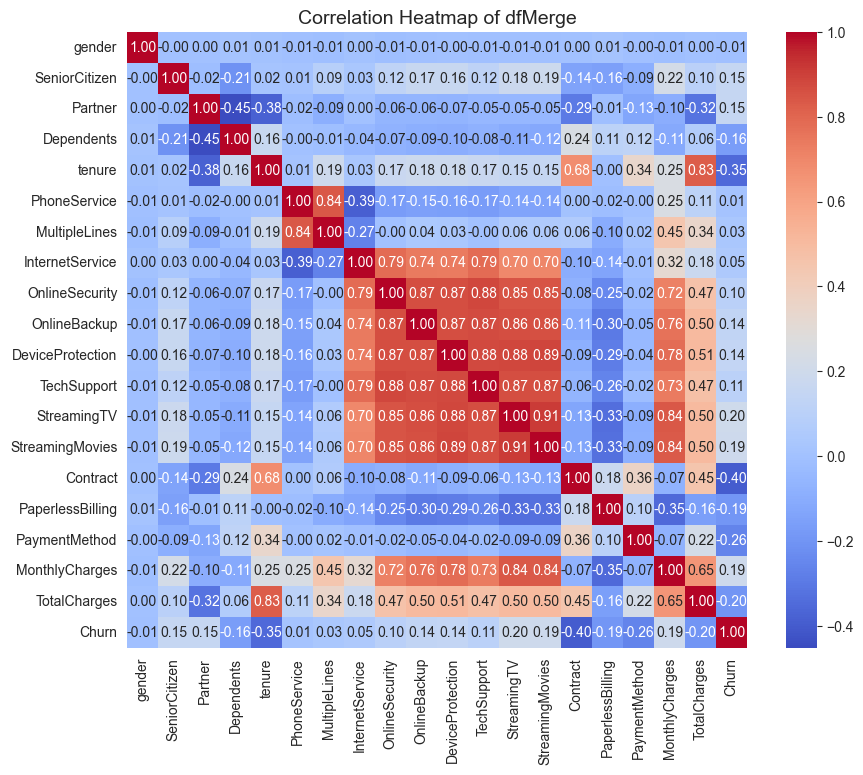

In [26]:
#Lets try to find correlation across variables
plt.figure(figsize=(10, 8))
sns.heatmap(dfMerge.drop("customerID", axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of dfMerge', fontsize=14)
plt.show()

__Insights on correlation__
* High correlation has been observed between OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,StreamingTV,StreamingMovies. As correlated columns don't add any value and may increase complexity for model. Hence they seems to be dependent. It is recommended to remove highly correlated columns before model building.
* Target column 'Churn' does not have much correclation. However, contract and tenure has somewhat negative correlation with churn.

### Q.2.F. Split the data into 80% train and 20% test

__Remove correlated independent columns and unwanted columns__
* Before splitting the data, we will remove independent columns those are higly correlated with each other.
* By removing correlated columns, we are reducing unwanted complexity and colinearity in the model.
* This will help increasing execution time for some models.

In [27]:
#Lets remove correlated independant columns and those who dosn't add any value. CustomerID does not add any value in model building.
X = dfMerge.drop(["Churn", "customerID", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"] , axis=1)
# X = dfMerge.drop(["Churn", "customerID"] , axis=1)
y = dfMerge["Churn"]

In [28]:
#Lets split data in training(80%) and testing(20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5625, 14)
(5625,)
(1407, 14)
(1407,)


### Q.2.G. Normalize/Standardize the data with the best suitable approach

In [52]:
#Lets normalize data using standardscalar
scaler = StandardScaler()
scaler.fit(X_train)
# Transform the data using the fitted scaler
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)


## Model building and performance improvement

__Goal statement__

We aim to develop a predictive model to effectively identify customers who are likely to churn in our telecommunications company. Our goal is to achieve high accuracy in predicting churn while also prioritizing the recall of the churn class to minimize the number of missed churners. By accurately identifying potential churners, we can implement targeted retention strategies to reduce customer churn and improve overall customer satisfaction and profitability.

__Note__ : We will focus on __Recall for 'class 1'__ along with accuracy as Recall is a measure of success in identifying potential customers.

**Key Points**:

* Let's find model with high True Positives and low False Negatives. This will ensure we are correctly predicting potential churning customers.

* Predictive Model Development: Develop an ensamble technique model capable of predicting customer churn based on shared data and relevant features.

* High Accuracy: Strive for high overall accuracy in the model's predictions to ensure that it accurately distinguishes between churners and non-churners.

* Recall for Churn Class: Prioritize achieving high recall for the churn class (Class 1) to minimize false negatives. It's crucial to identify as many actual churners as possible to implement proactive retention measures effectively.

* Targeted Retention Strategies: Utilize the model's predictions to implement targeted retention strategies tailored to the needs of potential churners. By addressing specific pain points or offering incentives, we aim to retain customers and prevent them from churning

**Efficient model building techniques we will use**
* Remove unwanted columns to reduce complexity, execution time
* Oversampling of data
* Normalization of data
* Hyperparameters tuning
* Cross validation


#### Lets define reusable common functions

In [30]:
#Lets define a function to store result of each model/combination in dataframe results_df
columns = ['Model','train_acc','test_acc','train_recall','test_recall','train_precision','test_precision','F1', 'Elapsed']
results_df = pd.DataFrame(columns=columns)
def AddModelResults(df, Model,train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,F1, Elapsed):
    if (df['Model'] == Model).any(): 
        df.loc[df['Model'] == Model, ['Model','train_acc','test_acc','train_recall','test_recall','train_precision','test_precision','F1', 'Elapsed']] = [Model, train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,F1, Elapsed]
    else:
        # Append a new row        
        new_row = {'Model': Model,'train_acc' : train_acc,'test_acc':test_acc,'train_recall':train_recall,'test_recall':test_recall,'train_precision':train_precision,'test_precision':test_precision, 'F1' : F1 , 'Elapsed': Elapsed}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    return df

In [31]:
#Key function that actually used to train model and print/save th eoutput of the model
def Modelfit_print(dfr,name,model, Xtrain, Xtest, ytrain, ytest, start = None, oversampling = False, PlotImportance= False, PlotTree = False):  # take the model, train data and test data as input
    #Oversampling based on demand
    if(oversampling):
        smt = SMOTE()
        Xtrain, ytrain = smt.fit_resample(Xtrain, ytrain)
    #Record model building start time when its not executed from outside (for gridsearchCV)    
    if (start is None):
        start = time.time()  # note the start time 

    model.fit(Xtrain, ytrain)   # fit the model using the train data

    pred_train = np.round(model.predict(Xtrain),2)
    pred_test = np.round(model.predict(Xtest),2)
    
    train_acc = np.round(model.score(Xtrain,ytrain),2)
    test_acc = np.round(model.score(Xtest,ytest),2)
    
    train_recall = np.round(metrics.recall_score(ytrain,pred_train),2)
    test_recall = np.round(metrics.recall_score(ytest,pred_test),2)
    
    train_precision = np.round(metrics.precision_score(ytrain,pred_train),2)
    test_precision = np.round(metrics.precision_score(ytest,pred_test),2)
    f1 = np.round(f1_score(ytest, pred_test),2)
    classification_rep = classification_report(ytest, pred_test, target_names=['No','Yes'])
    end = time.time()  #note the end time        
    
    print('*'*15, name, '*'*15)
    print("Accuracy on training set : ",train_acc)
    print("Accuracy on test set : ",test_acc)
    print("Recall on training set [Class1]: ",train_recall)
    print("Recall on test set [Class1]: ",test_recall)
    print("Precision on training set [Class1]: ",train_precision)
    print("Precision on test set [Class1]: ",test_precision)
    print("F1 on test set [Class1]: ",f1)
#     print("Classification Report(Test Data):")
#     print(classification_rep)
    duration = np.round(end - start,2)  # calculate the total duration
    print("Time taken : ", duration)
    Print_ConfusionMatrix(pred_test,ytest)
    if(PlotImportance):
        X1 = dfMerge.drop(["Churn", "customerID", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"] , axis=1)
#         X1 = dfMerge.drop(["Churn", "customerID"] , axis=1)
        PlotImportanceChart(model,X1)
    if(PlotTree):
        if(isinstance(model, DecisionTreeClassifier)):
            print(PlotTree)
            feature_cols = X_train.columns.tolist()
            dfres = AddModelResults(dfr, name,train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,f1, duration)
            img = plot_decision_tree_image(model, feature_names=feature_cols, class_names=['0', '1'], filename='decision_tree.png')
            return dfres, img
    return AddModelResults(dfr, name,train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,f1, duration)
        

In [32]:
## Function to display confusion matrix
def Print_ConfusionMatrix(y_predict,y_actual,labels=[1, 0]):    
    cm=metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (4,3))
    cmap = sns.color_palette("crest", as_cmap=True)
    sns.heatmap(df_cm, annot=labels,fmt='', cmap=cmap)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
#Function to tune hyperparameters using GridSearchCV for given models
def GridSearchTuning(dfr, name, model,parameters,X_train, X_test,y_train, y_test, acc_scorer = None, oversampling = False, PlotImportance= False, PlotTree = False):
    # Type of scoring used to compare parameter combinations    
    startTime = time.time()
    if(oversampling):#****
        smt = SMOTE()
        X_train, y_train = smt.fit_resample(X_train, y_train)
        oversampling = False
    # Run the grid search
    if (acc_scorer is None):
        GSCV = GridSearchCV(model, parameters, cv=5)
    else:
        GSCV = GridSearchCV(model, parameters, scoring=acc_scorer,cv=5)
    grid_obj = GSCV.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    bestModel = grid_obj.best_estimator_
    print(str(bestModel))

    # Fit the best algorithm to the data.
    #gbc_tuned.fit(X_train, y_train)    
    
    return Modelfit_print(dfr, name, bestModel,X_train, X_test,y_train, y_test, startTime,oversampling,PlotImportance, PlotTree)           

In [34]:
#Function to plot ImportanceChart for given model
def PlotImportanceChart(model, X):
#     print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X.columns))
    importances = model.feature_importances_
    indices = np.argsort(importances)         
    feature_names = list(X.columns)
    plt.figure(figsize=(8,8))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [35]:
#Function to plot decision tree
def plot_decision_tree_image(clf, feature_names, class_names, filename):
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, 
                    feature_names=feature_names,
                    class_names=class_names)
   
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(filename)
    return Image(graph.create_png())
     

### Q.3.A Train a model using Decision tree and check the performance of the model on train and test data 

*************** Decision tree | Original data(without Normalization) ***************
Accuracy on training set :  0.79
Accuracy on test set :  0.78
Recall on training set [Class1]:  0.38
Recall on test set [Class1]:  0.33
Precision on training set [Class1]:  0.69
Precision on test set [Class1]:  0.65
F1 on test set [Class1]:  0.44
Time taken :  0.04


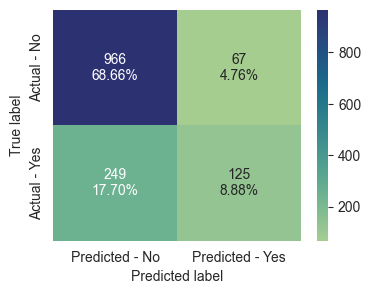

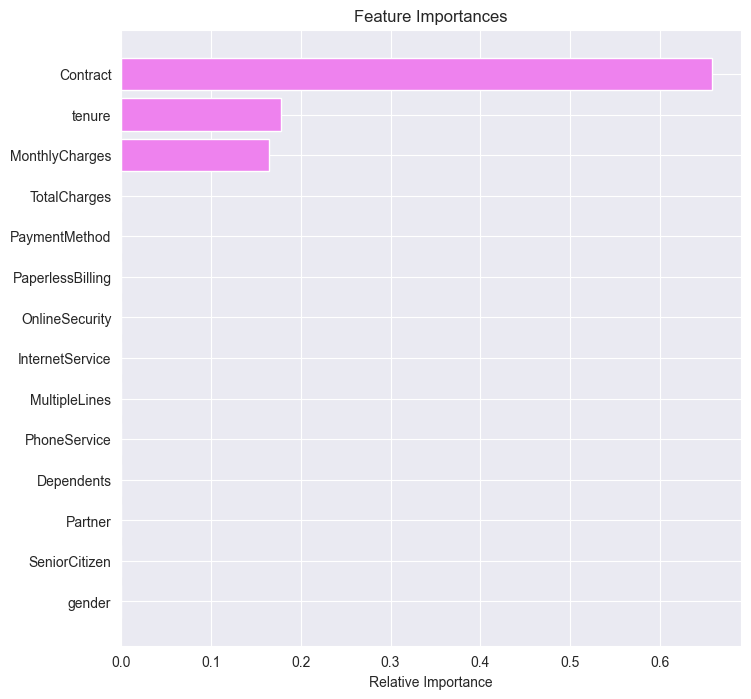

True


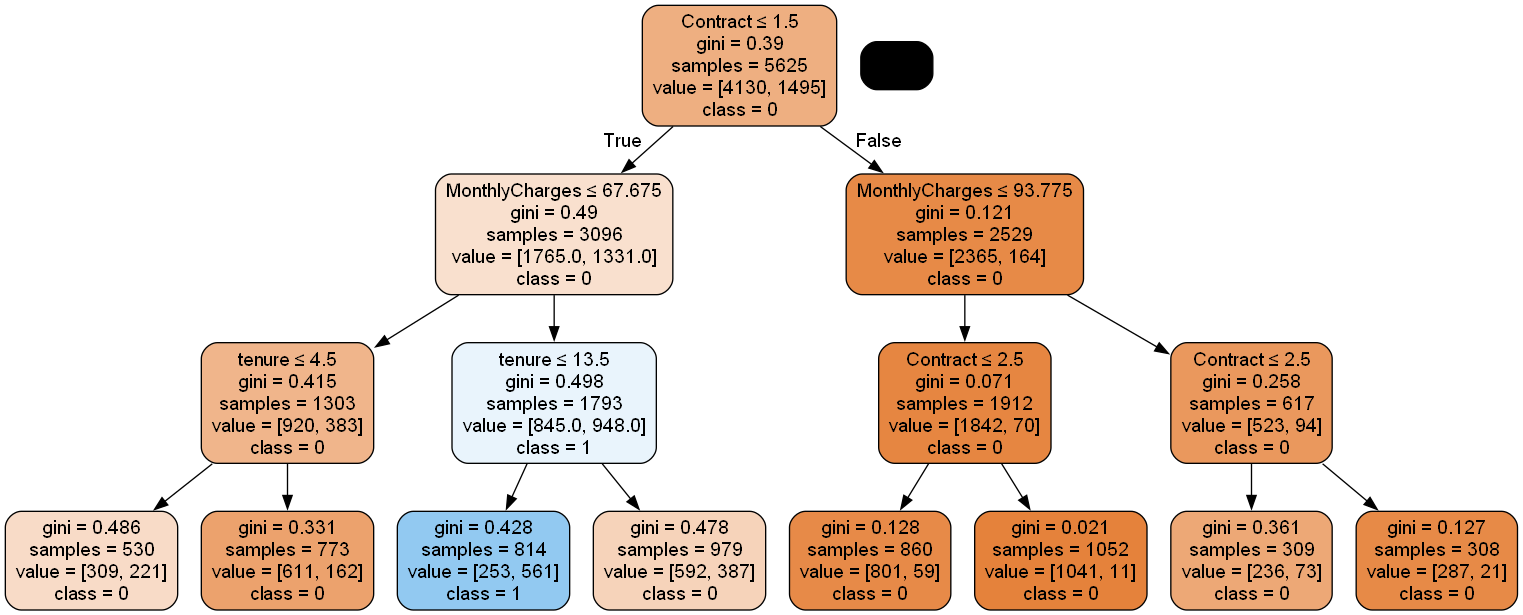

In [36]:
dtree = DecisionTreeClassifier(criterion = "gini",max_depth=3, min_samples_leaf=5, random_state=1)
results_df, plot_image  = Modelfit_print(results_df,'Decision tree | Original data(without Normalization)',dtree,X_train, X_test,y_train, y_test,None,False,True,True) 
plot_image
# feature_cols = X_train.columns.tolist()
#plot_decision_tree_image(dtree, feature_names=feature_cols, class_names=['0', '1'], filename='decision_tree.png')

Above visual representation of decision tree shows exact execution of model. 
Maxdepth parameter has limited the branching of the tree till 4 leaves


*************** Decision tree ***************
Accuracy on training set :  0.8
Accuracy on test set :  0.77
Recall on training set [Class1]:  0.44
Recall on test set [Class1]:  0.38
Precision on training set [Class1]:  0.69
Precision on test set [Class1]:  0.62
F1 on test set [Class1]:  0.47
Time taken :  0.05


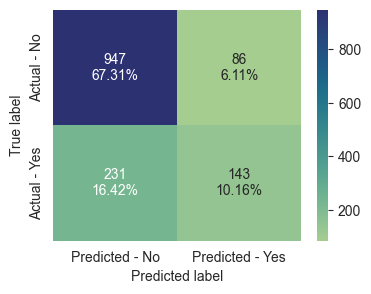

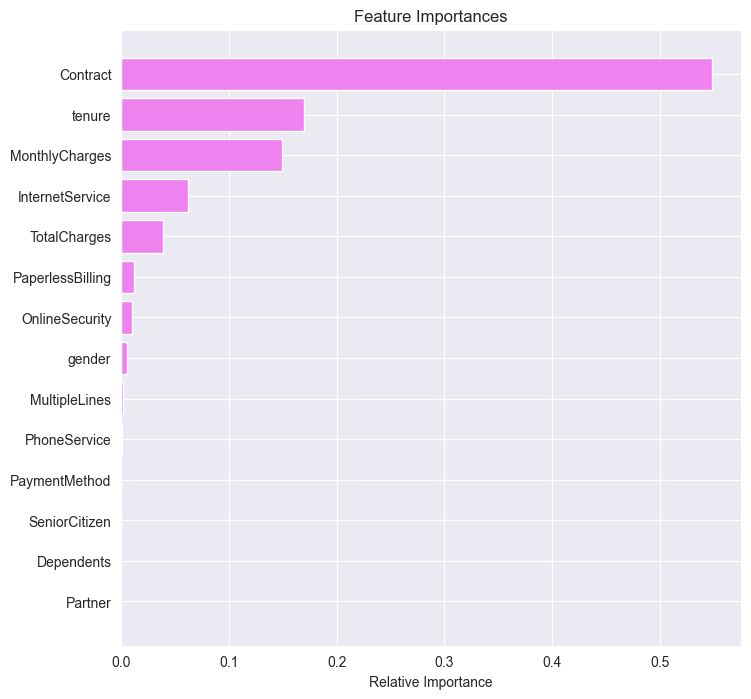

*************** Decision tree | Oversampled data) ***************
Accuracy on training set :  1.0
Accuracy on test set :  0.72
Recall on training set [Class1]:  1.0
Recall on test set [Class1]:  0.6
Precision on training set [Class1]:  1.0
Precision on test set [Class1]:  0.48
F1 on test set [Class1]:  0.53
Time taken :  0.05


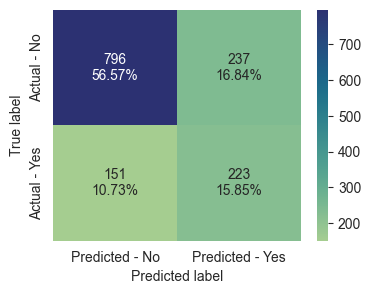

In [37]:
dtreesc = DecisionTreeClassifier(criterion = "gini",max_depth=5, min_samples_leaf=5, random_state=1)
results_df = Modelfit_print(results_df,'Decision tree',dtreesc,X_train_normalized, X_test_normalized, y_train, y_test,None,False,True)
dtreest = DecisionTreeClassifier(random_state=1)
results_df = Modelfit_print(results_df,'Decision tree | Oversampled data)',dtreest,X_train_normalized, X_test_normalized, y_train, y_test, None, True)

__Insights__
* While the model demonstrates near-perfect accuracy, recall, and precision on the training data, its performance diminishes considerably on the test data, indicating overfitting.

* Although the model achieves respectable accuracy scores of around 0.73 to 0.77 on the test data using both raw and normalized datasets, its performance in terms of recall and precision leaves room for improvement.

* Notably, the model exhibits significant false negatives and false positives, rendering it unreliable for practical use.
* Preprocessing technique like oversampling provide better results specially for recall 

### Q.3.B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=1)
*************** Decision tree | GridSearchTuning ***************
Accuracy on training set :  0.8
Accuracy on test set :  0.77
Recall on training set [Class1]:  0.44
Recall on test set [Class1]:  0.38
Precision on training set [Class1]:  0.69
Precision on test set [Class1]:  0.62
F1 on test set [Class1]:  0.47
Time taken :  10.02


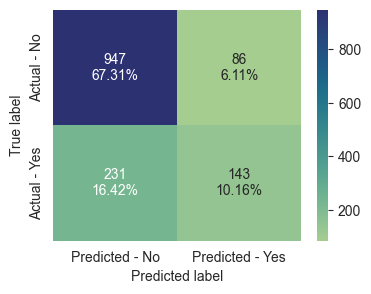

In [38]:
# Grid of parameters to choose from
dtree1 = DecisionTreeClassifier(random_state=1)
parameters = {
    "max_depth": [5, 10, 15],  
    "min_samples_split": np.arange(2, 10),  
    "min_samples_leaf": np.arange(1, 5), 
    "max_features": [None, "sqrt", "log2"]  
}
results_df = GridSearchTuning(results_df,'Decision tree | GridSearchTuning', dtree1,parameters,X_train_normalized, X_test_normalized,y_train, y_test)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, random_state=1)
*************** Decision tree | GridSearchTuning | Oversampled data ***************
Accuracy on training set :  0.86
Accuracy on test set :  0.74
Recall on training set [Class1]:  0.9
Recall on test set [Class1]:  0.72
Precision on training set [Class1]:  0.83
Precision on test set [Class1]:  0.51
F1 on test set [Class1]:  0.6
Time taken :  15.5


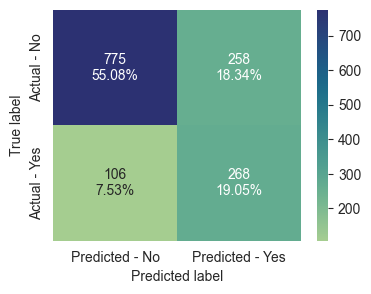

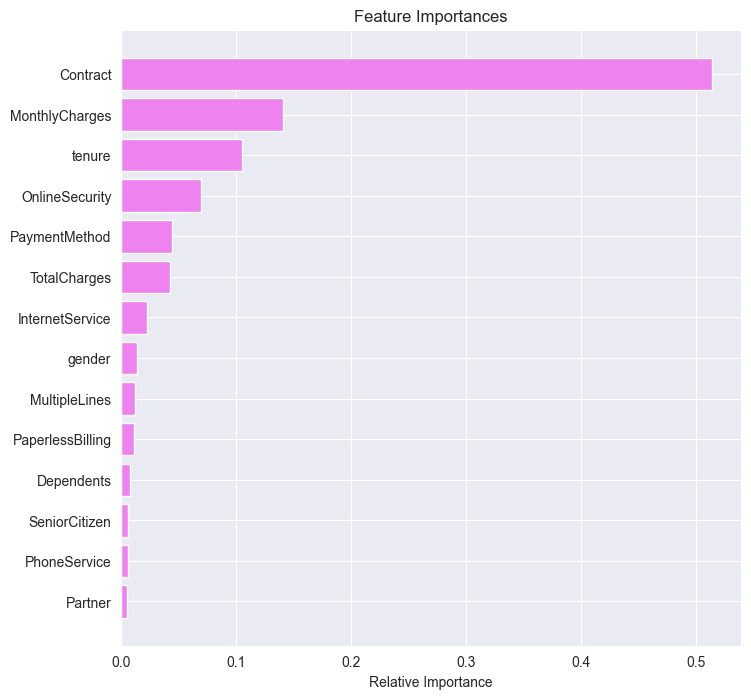

In [39]:
dtreecv = DecisionTreeClassifier(random_state=1)
paramCV = {
    "max_depth": [5, 10, 15],  
    "min_samples_split": np.arange(2, 10),  
    "min_samples_leaf": np.arange(1, 5), 
    "max_features": [None, "sqrt", "log2"]  
}
results_df = GridSearchTuning(results_df,'Decision tree | GridSearchTuning | Oversampled data', dtreecv,paramCV,X_train_normalized, X_test_normalized,y_train, y_test, None, True, True)

__Model Performance (GridSearchCV)__
* Utilizing gridsearchCV for hyperparameter tuning exhibits a marginal enhancement in performance compared to the standard decision tree, resulting almost same accuracy. In fact it reduces when tried on oversampled data. Nevertheless, both recall and precision scores improved at unsatisfactory levels. In fact very good recall score achieved when tried on oversampling data.

* Implementation of oversampling techniques proves beneficial in augmenting the recall score when coupled with gridsearchCV.


* Independent variables those are best considered by most models for predictions
    - Contract
    - Monthly charges
    - Total charges
    - tenure

__Insights__

Key Differences:

* Accuracy: The accuracy on the test set ranges from 0.67 to 0.78, comparable to the regular decision tree's performance.
* Recall: The recall scores on the test set vary from 0.62 to 0.79, showing a wider range of performance compared to the regular decision tree. Recall score on oversampled data increased from 0.54 to 0.70+ when used gridsearchCV over regular decision tree.
* Precision: Precision on the test set ranges from 0.46 to 0.62, again exhibiting variation across different preprocessing techniques and oversampling.
* Time Taken: The time taken for model training and evaluation increased a bit due to gridsearchCV tuning parameter.
* Overall, while GridSearchCV-refined decision tree models exhibit enhancements in certain metrics, notably recall when combined with oversampling, there exists room for further refinement, particularly in improving precision scores.

### Q.3.C Train a model using Random forest and check the performance of the model on train and test data

*************** RandomForestClassifier ***************
Accuracy on training set :  1.0
Accuracy on test set :  0.79
Recall on training set [Class1]:  0.99
Recall on test set [Class1]:  0.47
Precision on training set [Class1]:  1.0
Precision on test set [Class1]:  0.65
F1 on test set [Class1]:  0.55
Time taken :  0.32


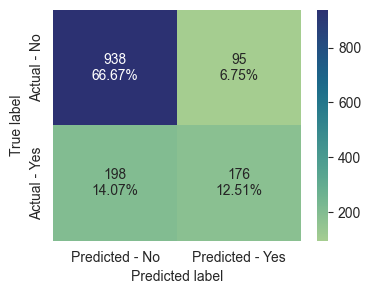

In [40]:
rfcl = RandomForestClassifier(n_estimators = 50)
#results_df = Modelfit_print(results_df,'RandomForestClassifier',rfcl,X_train, X_test, y_train, y_test)
results_df = Modelfit_print(results_df,'RandomForestClassifier',rfcl,X_train_normalized, X_test_normalized, y_train, y_test)


__Insights__
* Near-Perfect Training Scores:
    The Random Forest model achieves near-perfect scores on the training data, indicating that it fits the training data very closely. 
* Better Test Accuracy Compared to Decision Tree:
    Despite the overfitting evident from the near-perfect training scores, the Random Forest model generally performs better on the test data compared to a single Decision Tree model.

* Indication of Overfitting:
    The discrepancy between the high training accuracy and comparatively lower test accuracy suggests overfitting, where the model is memorizing noise or random fluctuations in the training data rather than learning meaningful patterns.
* Unsatisfactory Test Recall:
    The recall score on the test data is unsatisfactory, indicating that the model fails to identify a significant portion of positive instances from the test data.
* Incremental Improvement in Test Precision:
    While there is an improvement in precision on the test data compared to a Decision Tree model, it's not sufficient, suggesting that the model still struggles with false positives.
* High Accuracy, Decent Precision, Low Recall:
    The model achieves high accuracy and decent precision, but the low recall indicates a bias towards negative instances, which is typical of an overfit model.

### Q.3.D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=5,
                       min_samples_leaf=4, min_samples_split=5, n_estimators=30,
                       random_state=1)
*************** RandomForestClassifier | GridSearchTuning | Oversampled data) ***************
Accuracy on training set :  0.8
Accuracy on test set :  0.71
Recall on training set [Class1]:  0.91
Recall on test set [Class1]:  0.83
Precision on training set [Class1]:  0.74
Precision on test set [Class1]:  0.48
F1 on test set [Class1]:  0.61
Time taken :  12.06


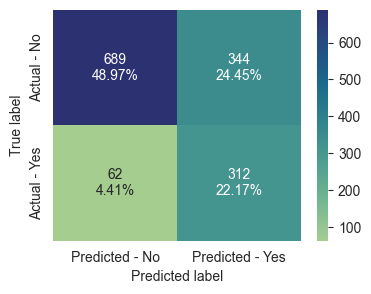

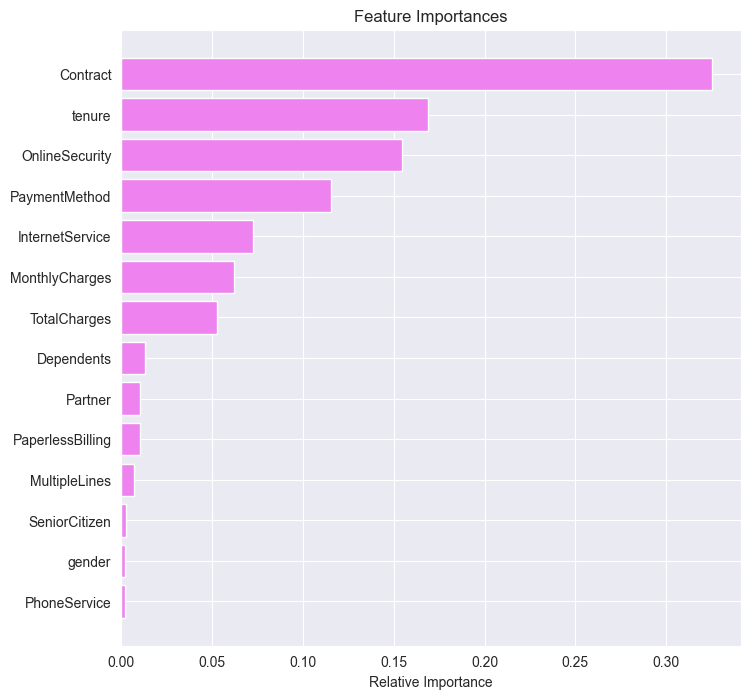

In [49]:
rf_classifier = RandomForestClassifier(random_state=1,class_weight={0: 0.4, 1: 0.6})

# rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [30,50], 
    'max_depth': [5, 10],   
    'min_samples_split': [5, 7],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'auto'] 
}
acc_scorer = metrics.make_scorer(metrics.recall_score)
results_df = GridSearchTuning(results_df,'RandomForestClassifier | GridSearchTuning | Oversampled data)', rf_classifier,param_grid,X_train_normalized, X_test_normalized,y_train, y_test, acc_scorer, True, True)


__Model performance and differences observed in performance in Q3.c and Q3.d__
* Base Model: The base Random Forest Classifier model achieved a perfect accuracy of 1.0 on the training set, indicating potential overfitting, while the accuracy on the test set was 0.71. Recall/precision is not that good.
* GridSearchCV Tuning Model on Normalized Oversampled Data : Tuning parameters using GridSearchCV on RandomForestModel has helped to gain good balance between accuracy, recall and precision on testing data. Recall has improved significantly from 0.49 to 0.83. precision reduced to 0.48 from 0.65
* Though precision is low compared to recall, aim here is to maximize recall to reduce false negatives. Hence this model performs descent (when tried on normalized oversampled data).

__Insights and Differences:__

* Overfitting Reduction: Parameter tuning helped in reducing overfitting, as evidenced by the decrease in accuracy on the training set while maintaining decent performance on the test set.
* Improved Recall: Parameter tuning, especially on oversampled data, improved the model's ability to identify positive instances (as indicated by recall) while sacrificing some precision.
* Overall, the parameter-tuned model on normalized oversampled data seems to strike a better balance between performance metrics, especially in scenarios where identifying positive instances (recall) is crucial.


* Independent variables those are best considered by most models for predictions
    - Contract
    - Monthly charges
    - Total charges
    - tenure
    - Payment Methods
    - Online security
    - Payment method

### Q.3.E. Train a model using Adaboost and check the performance of the model on train and test data

*************** AdaBoostClassifier ***************
Accuracy on training set :  0.81
Accuracy on test set :  0.79
Recall on training set [Class1]:  0.54
Recall on test set [Class1]:  0.49
Precision on training set [Class1]:  0.67
Precision on test set [Class1]:  0.63
F1 on test set [Class1]:  0.55
Time taken :  0.27


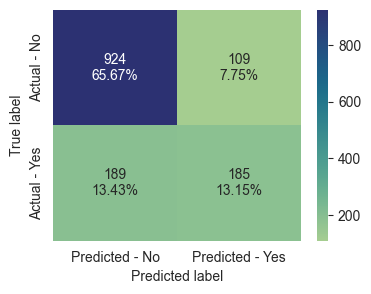

In [42]:
abc = AdaBoostClassifier(random_state=1)
results_df = Modelfit_print(results_df,'AdaBoostClassifier',abc, X_train_normalized, X_test_normalized, y_train, y_test)

__Insights__

* Accuracy:
    The AdaBoostClassifier achieves an accuracy of 0.81 on the training set and 0.79 on the test set, indicating that the model generalizes well to unseen data.
* Recall:
    Both training and test recall scores are unsatisfactory, with a value of 0.54 on the training set and 0.49 on the test set. This suggests that the model don't identify potential churners on large extent, especially in the test data.
* Precision:
    Precision scores are relatively higher, with a value of 0.67 on the training set and 0.63 on the test set. This indicates that when the model predicts positive instances, it is correct around 66% of the time on the training set and 62% of the time on the test set.
* Time Taken:
    The model's training time is just 0.29 seconds, which is relatively low, suggesting that AdaBoosting is computationally efficient for this dataset.

Overall, the AdaBoostClassifier trained on normalized data demonstrates decent performance in terms of accuracy, and precision. However, there is room for improvement, especially in enhancing recall to capture more positive instances without compromising precision. As mentioned in goal statement, can't settle on this model as this will lead so much false negatives. 

### Q.3.F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=1.8000000000000007, n_estimators=70)
*************** AdaBoostClassifier | GridSearchTuning ***************
Accuracy on training set :  0.81
Accuracy on test set :  0.78
Recall on training set [Class1]:  0.58
Recall on test set [Class1]:  0.53
Precision on training set [Class1]:  0.67
Precision on test set [Class1]:  0.61
F1 on test set [Class1]:  0.57
Time taken :  157.51


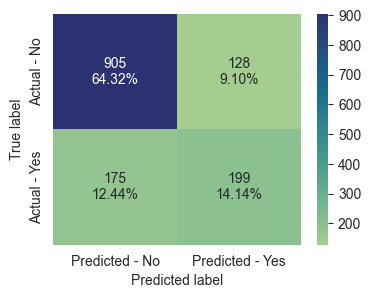

In [43]:
base_estimator = DecisionTreeClassifier(max_depth=1)
abc1 = AdaBoostClassifier()
params = {
    #Let's try different max_depth for base_estimator
    'estimator': [DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    'n_estimators': [30, 100],
    "n_estimators": np.arange(60,100,10),
    "learning_rate":np.arange(1,2,0.1),    
}

acc_scorer = metrics.make_scorer(metrics.recall_score)
results_df = GridSearchTuning(results_df,'AdaBoostClassifier | GridSearchTuning', abc1,params,X_train_normalized, X_test_normalized,y_train, y_test, acc_scorer)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   n_estimators=30)
*************** AdaBoostClassifier | GridSearchTuning | Oversampled data ***************
Accuracy on training set :  0.84
Accuracy on test set :  0.77
Recall on training set [Class1]:  0.86
Recall on test set [Class1]:  0.67
Precision on training set [Class1]:  0.83
Precision on test set [Class1]:  0.55
F1 on test set [Class1]:  0.61
Time taken :  105.66


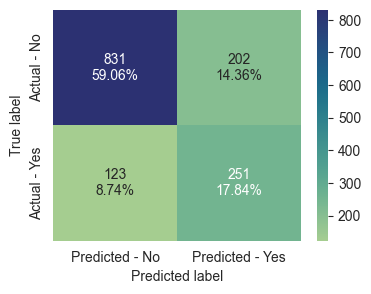

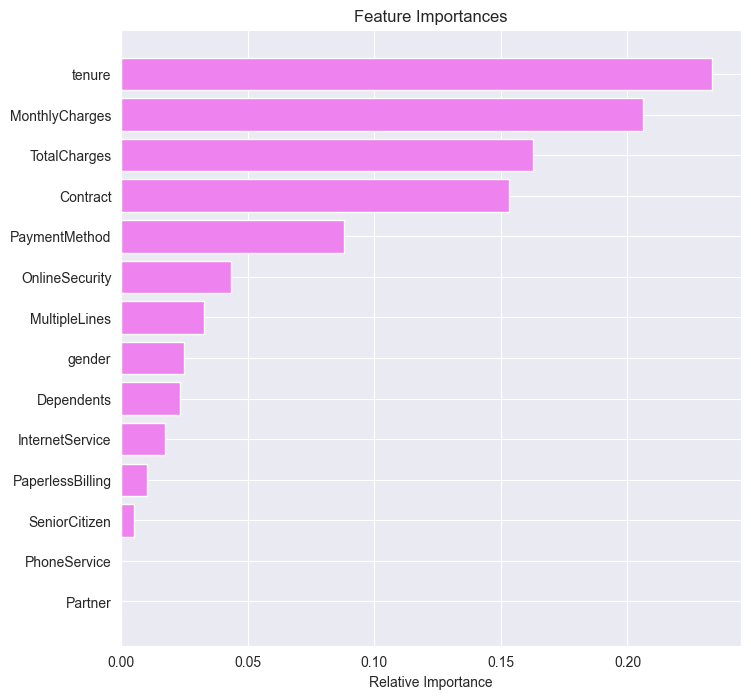

In [44]:
base_estimator = DecisionTreeClassifier(max_depth=1)
abc1 = AdaBoostClassifier()
params = {
    #Let's try different max_depth for base_estimator
    'estimator': [DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    'n_estimators': [30, 100],
#     "n_estimators": np.arange(60,100,10),
    "learning_rate":np.arange(1,2,0.1)
}
acc_scorer = metrics.make_scorer(metrics.recall_score)
results_df = GridSearchTuning(results_df,'AdaBoostClassifier | GridSearchTuning | Oversampled data', abc1,params,X_train_normalized, X_test_normalized,y_train, y_test, acc_scorer, True, True)

__Comparison Insights:__

* Accuracy: The GridSearchCV tuned models show slight improvements in accuracy over the regular model, especially in the case of normalized data. However, the improvement is not significant.
* Recall: The recall scores vary across the models. The model trained on normalized oversampled data with GridSearchCV tuning shows the highest recall on both training and test sets, indicating better performance in identifying positive instances. This is one area we can consider as improvement when used gridsearchCV on oversampled data. Recall score matters in our scenario.
* Precision: Precision scores remain relatively consistent across the models. There is no significant improvement in precision with the GridSearchCV tuned models. In fact it reduced when we used oversampling.
* Training Time: The training time significantly increases with GridSearchCV tuning, especially with normalized oversampled data, due to the exhaustive search for optimal hyperparameters.

In summary, while GridSearchCV tuning slightly improves performance metrics such as accuracy and recall, it comes at the cost of increased training time.  Additionally, oversampling seems to have a positive impact on recall.


### Q.3.G. Train a model using GradientBoost and check the performance of the model on train and test data

*************** GradientBoostingClassifier ***************
Accuracy on training set :  0.82
Accuracy on test set :  0.79
Recall on training set [Class1]:  0.55
Recall on test set [Class1]:  0.47
Precision on training set [Class1]:  0.72
Precision on test set [Class1]:  0.63
F1 on test set [Class1]:  0.54
Time taken :  0.66
*************** GradientBoostingClassifier | Oversampled data ***************
Accuracy on training set :  0.84
Accuracy on test set :  0.77
Recall on training set [Class1]:  0.88
Recall on test set [Class1]:  0.71
Precision on training set [Class1]:  0.82
Precision on test set [Class1]:  0.56
F1 on test set [Class1]:  0.63
Time taken :  1.0


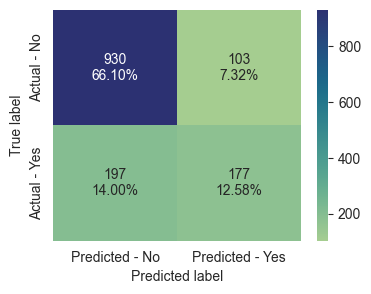

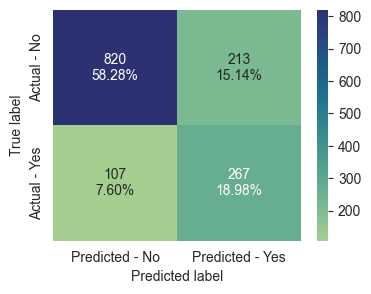

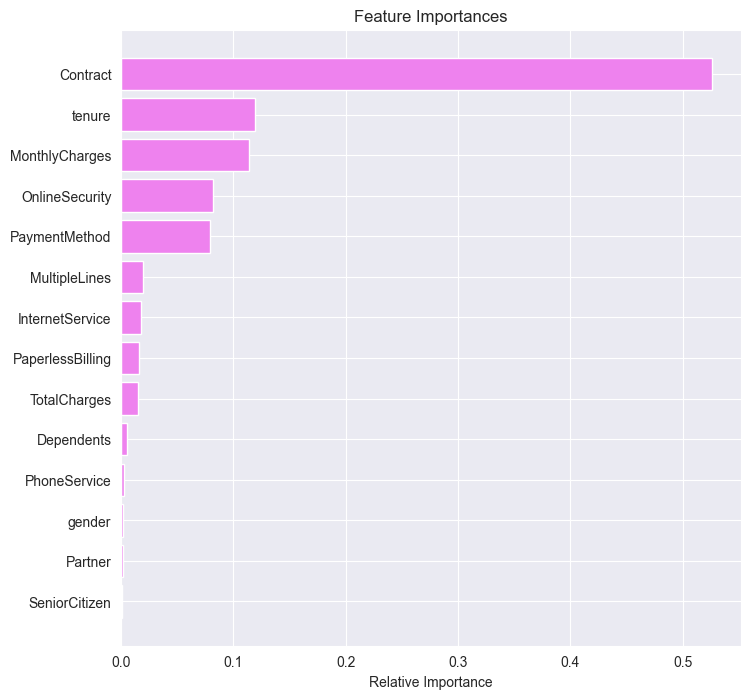

In [45]:
gbc = GradientBoostingClassifier(random_state=1)
#results_df = Modelfit_print(results_df,'GradientBoostingClassifier',gbc, X_train, X_test, y_train, y_test, None)
results_df = Modelfit_print(results_df,'GradientBoostingClassifier',gbc, X_train_normalized, X_test_normalized, y_train, y_test)

results_df = Modelfit_print(results_df,'GradientBoostingClassifier | Oversampled data',gbc, X_train_normalized, X_test_normalized, y_train, y_test, None, True, True)


__Insights__

* Accuracy: The GradientBoosting model performs well on both the training and test sets, with accuracies of 0.83 and 0.79 respectively for the regular model and 0.81 and 0.75 respectively for the model trained on normalized oversampled data.
* Recall: The model trained on normalized oversampled data shows a significant improvement in recall on both training and test sets compared to the regular model. This indicates better performance in identifying positive churners.
* Precision: Precision is slightly higher for the regular model compared to the model trained on normalized oversampled data. However, the precision of the latter is still reasonable.
* Training Time: The training time for both models is relatively low. This suggests that GradientBoosting is computationally efficient for this dataset.

Overall, the GradientBoosting model shows good performance in terms of accuracy, recall, and precision. The model trained on normalized oversampled data improves recall, indicating better identification of potential churners, with a slight decrease in precision. Based on the scenario, this is definitely good option to consider due to good accuracy and recall with low training time.

### Q,3.H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h

GradientBoostingClassifier(max_depth=10, max_features=1, min_samples_split=10,
                           n_estimators=50, random_state=1, subsample=1)
*************** GradientBoostingClassifier | GridSearchTuning | Oversampled data ***************
Accuracy on training set :  0.93
Accuracy on test set :  0.77
Recall on training set [Class1]:  0.97
Recall on test set [Class1]:  0.65
Precision on training set [Class1]:  0.91
Precision on test set [Class1]:  0.57
F1 on test set [Class1]:  0.6
Time taken :  274.84


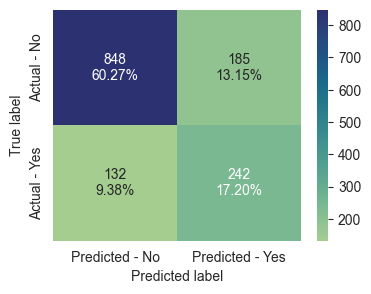

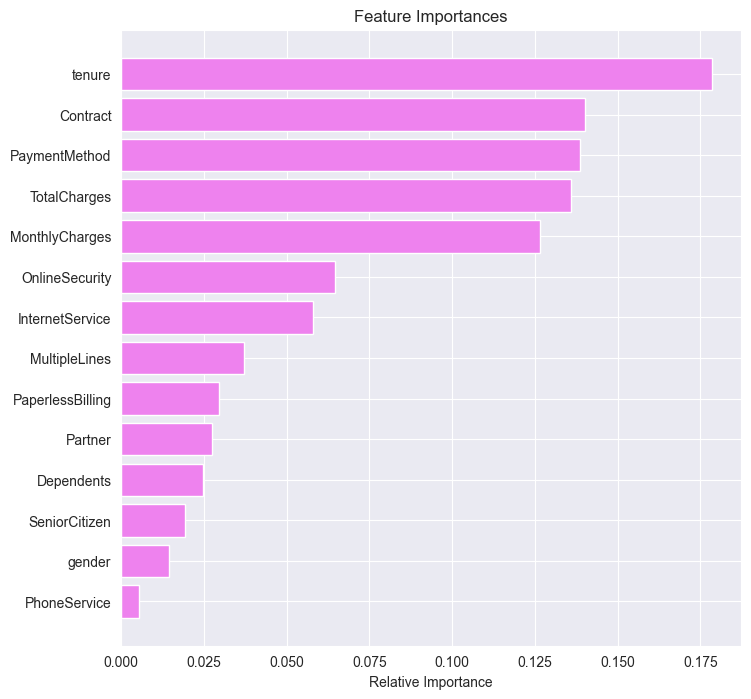

In [46]:
gbc1 = GradientBoostingClassifier(random_state=1)
paramsGbc = {
    "n_estimators": [30, 50],
    "subsample":[0.7,0.9,1],
    "max_features":[0.6, 1],
    'max_depth': [10, 15],
    'min_samples_split': [7, 10]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)
results_df = GridSearchTuning(results_df,'GradientBoostingClassifier | GridSearchTuning | Oversampled data', gbc1,paramsGbc,X_train_normalized, X_test_normalized,y_train, y_test, acc_scorer,True, True)


__Insights__

* Accuracy: The model with hyperparameter tuning achieves a higher accuracy on the training set (0.97) compared to the earlier model (0.81), but the accuracy on the test set is almost same.
* Recall: The model with hyperparameter tuning resulted reduction in recall (0.78 to 0.69). This will result in more false negatives hence missing out opportunities to identify churning customers.
* Precision: The precision on the training set remains high for both models (0.94 for tuned model, 0.78 for earlier model), but there's no improvement in precision on the test set with hyperparameter tuning (0.54) compared to the earlier model (0.52).
* Training Time: The model with hyperparameter tuning requires significantly more time for training compared to the earlier model , mainly due to the exhaustive search for optimal hyperparameters.

Summary:

The GradientBoosting model with hyperparameter tuning doesn't improves the perfoormance on test data. In fact recall and precision has reduced when used parameter tuning using gridsearchCV.
The significant increase in training time with hyperparameter tuning with no significant improvement is downside of this model.
Overall, the model with hyperparameter tuning didn'r demonstrated better performance.

#### Cross validation

Cross-Validation Results:
Mean Accuracy: 0.7849837380866445
Standard Deviation: 0.010968935719140692
*************** GradientBoostingClassifier | Cross-Validation | Oversampled data ***************
Accuracy on training set :  1.0
Accuracy on test set :  0.76
Recall on training set [Class1]:  1.0
Recall on test set [Class1]:  0.59
Precision on training set [Class1]:  0.99
Precision on test set [Class1]:  0.55
F1 on test set [Class1]:  0.57
Time taken :  2.39


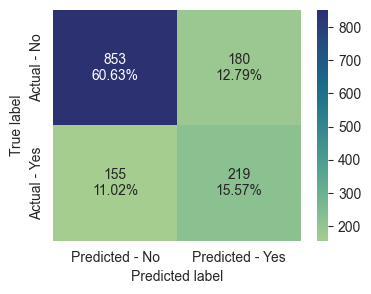

In [47]:
##### Lets try some cross validation technique
model_cv = GradientBoostingClassifier(n_estimators=50, subsample=0.7, max_features=0.6, max_depth=15, min_samples_split=7)

# Define the number of folds for cross-validation
k_folds = 5

# Initialize the cross-validation splitter
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(model_cv, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Results:")
print("Mean Accuracy:", cv_results.mean())
print("Standard Deviation:", cv_results.std())
results_df = Modelfit_print(results_df,'GradientBoostingClassifier | Cross-Validation | Oversampled data',model_cv, X_train_normalized, X_test_normalized, y_train, y_test, None, True, False)


__Insights__

Cross validation helped to identify better model. Identified model provides good results but we already have better results for model trained with other combinations.

### Q.3.I. Provide detailed analysis of the below steps

__Independent variables those are best considered by most models for predictions__
- Contract
- Monthly charges
- Total charges
- tenure
- Payment Methods

__Note :__
We tried building model keeping all columns and then removing unwanted columns. Post comparing the output of both methods, it has been obesrved that reducing unnecessarry columns didn't reduced model performance. in fact it increased __efficiency__ for certain complex models. It helped reducing __complexity__ and __execution time__ .

##### 1. Compare the performance of each model in train stage and test stage

In [50]:
# Lets display output from all the models we tried so far
pd.set_option('display.max_colwidth', None)
results_df

Model  \
0               Decision tree | Original data(without Normalization)   
1                                                      Decision tree   
2                                  Decision tree | Oversampled data)   
3                                   Decision tree | GridSearchTuning   
4                Decision tree | GridSearchTuning | Oversampled data   
5                                             RandomForestClassifier   
6      RandomForestClassifier | GridSearchTuning | Oversampled data)   
7                                                 AdaBoostClassifier   
8                              AdaBoostClassifier | GridSearchTuning   
9           AdaBoostClassifier | GridSearchTuning | Oversampled data   
10                                        GradientBoostingClassifier   
11                     GradientBoostingClassifier | Oversampled data   
12  GradientBoostingClassifier | GridSearchTuning | Oversampled data   
13  GradientBoostingClassifier | Cross-Validation | Oversampled data   

    train_acc  test_acc  train_recall  test_recall  train_precision  \
0        0.79      0.78          0.38         0.33             0.69   
1        0.80      0.77          0.44         0.38             0.69   
2        1.00      0.72          1.00         0.60             1.00   
3        0.80      0.77          0.44         0.38             0.69   
4        0.86      0.74          0.90         0.72             0.83   
5        1.00      0.79          0.99         0.47             1.00   
6        0.80      0.71          0.91         0.83             0.74   
7        0.81      0.79          0.54         0.49             0.67   
8        0.81      0.78          0.58         0.53             0.67   
9        0.84      0.77          0.86         0.67             0.83   
10       0.82      0.79          0.55         0.47             0.72   
11       0.84      0.77          0.88         0.71             0.82   
12       0.93      0.77          0.97         0.65             0.91   
13       1.00      0.76          1.00         0.59             0.99   

    test_precision    F1  Elapsed  
0             0.65  0.44     0.04  
1             0.62  0.47     0.05  
2             0.48  0.53     0.05  
3             0.62  0.47    10.02  
4             0.51  0.60    15.50  
5             0.65  0.55     0.32  
6             0.48  0.61    12.06  
7             0.63  0.55     0.27  
8             0.61  0.57   157.51  
9             0.55  0.61   105.66  
10            0.63  0.54     0.66  
11            0.56  0.63     1.00  
12            0.57  0.60   274.84  
13            0.55  0.57     2.39

##### 2. Provide your observation on which model performed the best

Two models can be identified as best performing performing models in consideration of balance between accuracy, recall of class1 and execution time.

* __RandomForestClassifier | GridSearchTuning | Oversampled data__ [Test accuracy :0.71, Test Recall :0.83, Test Precision :0.48, Execution Time : 12 seconds]
* __GradientBoostingClassifier | Oversampled data__ [Test accuracy :0.77, Test Recall :0.71, Test Precision :0.56, Execution Time : 1 seconds]

As mentioned in goal statement, we are focussing on Class1 Recall. Hence we can choose  __RandomForestClassifier | GridSearchTuning | Oversampled data__ as our best model.

##### 3. Provide your reasoning on why the model performed best

* GradientBoostingClassifier (Normalized Oversampled data):
    Test Accuracy: 0.77
    Test Recall: 0.71
    Elapsed Time: 1 seconds

* RandomForestClassifier(GridSearchTuning - Normalized Oversampled data):
    Test Accuracy: 0.71
    Test Recall: 0.83
    Elapsed Time: 12 seconds

__Note__ : Recall for 'class 1' of target variable is what mentioned above. Our interest is to find good combination for overall accuracy and recall.

Both models demonstrate good accuracy and recall, but let's assess which one is the best based on the combined criteria of accuracy, recall, and elapsed time. Both models are able to maximize true positives and minimize false negatives significantly.

Comparing the two:

Although the __GradientBoostingClassifier__ has good higher accuracy and significantly lower elapsed time, its the __RandomForestClassifier__ has exceptional recall with accuracy and precision. Though it takes slightly more time than GradientBoostingClassifier, it is completely worth at the cost of saving potentially churning customers.

Therefore, based on the balanced consideration of accuracy, recall, and elapsed time, the __RandomForestClassifier__ (GridSearchTuning - Normalized Oversampled data) emerges as the best models among the two. 

##### 4.  Provide your final conclusion on your observation

__Conclusion__

As outlined in our goal statement, our objective was to develop a model capable of accurately predicting customers who are likely to churn (classified as churn class 1). It's crucial for our model to minimize any missed opportunities in identifying potential churners while also avoiding false positives to ensure precision. Therefore, achieving a high accuracy and recall, particularly for class 1 (churners), was important.

With our analysis, we have identified two models that strike a strong balance between accuracy and recall: the 'RandomForestClassifier(GridSearchTuning - Normalized Oversampled data)' and the 'GradientBoostingClassifier (Normalized Oversampled data)'. These models excel in accurately identifying churners while also minimizing missed opportunities.

Moving forward, these models empower telecom companies to implement effective retention strategies targeted towards the identified potential churners. By leveraging the insights provided by these models, telecom companies can proactively engage with at-risk customers, thereby mitigating churn and fostering customer loyalty. 

__General Observations:__
* Decision Trees:
    Decision trees trained on standardized data with oversampling tend to have better recall compared to other variations.
    Grid search tuning helps improve accuracy and precision while maintaining or slightly improving recall.
    Random Forest:

* Random Forest models generally exhibit high accuracy and precision.
    Tuning hyperparameters using grid search helps optimize performance, particularly in maintaining a balance between accuracy and recall.

* AdaBoost:
    AdaBoost models show improvements in accuracy and precision compared to the base models.
    Normalization of data aids in achieving better overall performance.

* Gradient Boosting:
    Gradient Boosting models offer high accuracy and precision.
    Oversampling techniques combined with normalization improve recall, although grid search tuning may not always lead to significant improvements in recall.

* Data scaling/normalizarion

[Other factors]:
- __Oversampling__ techniques, particularly when combined with normalization, tend to enhance model performance, especially in terms of recall.
- __Hyperparameter__ tuning through methods like grid search can significantly improve model accuracy and precision, but its impact on recall may vary.
- We tried building model keeping all columns and then removing unwanted columns. It has been found that reducing unnecessarry columns didn't reduced model performance. in fact it increased __efficiency__ for certain complex models. It helped reducing __complexity__ and __execution time__ . While shorter execution times are generally preferable, particularly in real-time applications, models with longer training times may be acceptable if they provide substantial improvements in performance.
- Regularization techniques such as cross-validation can help prevent overfitting and improve the generalization capability of models.
